# Twitter Demographics

This notebook replicates the analysis in the paper:
Aron Culotta, Nirmal Ravi Kumar, and Jennifer Cutler. ["Predicting Twitter User Demographics using Distant Supervision from Website Traffic Data"](http://tapilab.github.io/user%20attribute%20inference/2016/03/01/predicting/) *Journal of Artificial Intelligence*, 2016.

The goal of this analysis is to predict the demographics of Twitter users based on whom they follow and what they tweet.

This notebook has been tested in **Python 2.7** only.

The code below is exactly what was used produce the tables and figures in the final version of the paper. See `requirements.txt` for the versions of external libraries used.

**Data**

Please see the paper for the details of data collection. This notebook assumes access to the preprocessed data, which is available here:

https://www.dropbox.com/s/vtuha0pgihhxp4d/jair-2016-demographics-data.tgz?dl=0

Please contact Aron (`aronwc@gmail.com`) for access.

This is about 1G. Once you download this data, place it in a folder called `data`, in the same folder as this notebook.

In [2]:
import os
import urllib
import pickle
username2brand = pickle.load(open('data/username2brand.pkl', 'rb'))
brand2counts = pickle.load(open('data/brand2counts.pkl', 'rb'))
id2brand = pickle.load(open('data/id2brand.pkl', 'rb'))

In [10]:
print '%d brands' % len(id2brand)

1072 brands


In [11]:
# Print the top accounts for the first brand.
print brand2counts.keys()[0], sorted(brand2counts.values()[0].items(), key=lambda x: -x[1])[:5]

15650816 [(35764757, 231), (15846407, 217), (25525507, 203), (90420314, 186), (34381878, 177)]


In [12]:
# Read the demographics of each brand.
import json
username2demo = dict()
for line in open('data/brands.json', 'rt'):
    js = json.loads(line)
    username2demo[js['twitter'].lower()] = js
print 'read', len(username2demo), 'demographics'

read 1428 demographics


In [13]:
# Add demographics to each brand dict (where available)
count = 0
for username, brand in username2brand.iteritems():    
    if username in username2demo:
        brand['demo'] = username2demo[username]
        id2brand[brand['_id']]['demo'] = username2demo[username]
        count += 1
    else:
        print 'no demo for', username
print 'found demographics for %d brands' % count

no demo for bridalguidemag
no demo for fftoolbox
no demo for mommyshorts
no demo for snapwidget
no demo for psudotcom
no demo for tomandlorenzo
no demo for bor
no demo for urbandecay
no demo for 140proof
no demo for voceropr
no demo for nowness
no demo for foxsports
no demo for history
no demo for wallstcs
no demo for irokotv
no demo for shopwell
no demo for thelmagazine
no demo for wgtc_site
no demo for geeksofdoom
no demo for si_golf
no demo for untappedcities
no demo for kineda
no demo for firehousenews
no demo for semitrucks
no demo for justintv
no demo for visitkc
no demo for simplyrecipes
no demo for bethenny
no demo for nyulocal
no demo for myxer
no demo for jaltucher
no demo for texashsfootball
no demo for universetoday
no demo for dodgersnation
no demo for svpply
no demo for askamanager
no demo for brightscope
no demo for maximmag
no demo for okayplayer
no demo for giantfoodstores
no demo for livemixtapes
no demo for addictinggames
no demo for mmaweeklycom
no demo for hasitlea

In [14]:
# Set self reference counts to 0.
for brand in brand2counts:
    brand2counts[brand][brand] = 0.
# Now, the brand id should not appear in the count dict.
print brand2counts.keys()[0], sorted(brand2counts.values()[0].items(), key=lambda x: -x[1])[:5]

15650816 [(35764757, 231), (15846407, 217), (25525507, 203), (90420314, 186), (34381878, 177)]


In [15]:
# Plot descriptive stats of the data
# - number of friend-of-followers per brand?
# - number of followers per feature?

Populating the interactive namespace from numpy and matplotlib
total friend links: 177997246.0


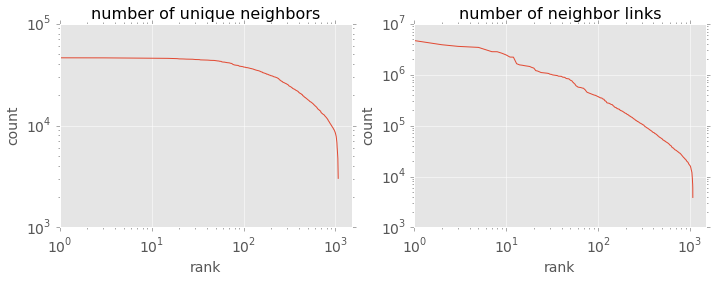

In [717]:
import matplotlib.pyplot as plt
%pylab inline --no-import-all
plt.style.use('ggplot')

def plot_data_figs():
    figure, axes = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=False)
    unique_friends = sorted([len(d.keys()) for d in brand2counts.values()], reverse=True)
    axes[0].plot(unique_friends)
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')
    axes[0].set_title('number of unique neighbors', size=16)

    brcounts = sorted([sum(d.values()) for d in brand2counts.values()], reverse=True)
    print 'total friend links:', sum(brcounts)
    axes[1].plot(brcounts)
    axes[1].set_xscale('log')
    axes[1].set_yscale('log')
    axes[1].set_title('number of neighbor links', size=16)
    axes[1].set_xlim((0,1500))
    axes[0].set_xlabel('rank', size=14)
    axes[1].set_xlabel('rank', size=14)
    axes[0].set_ylabel('count', size=14)
    axes[1].set_ylabel('count', size=14)
    figure.tight_layout()
    plt.savefig('data.pdf', bbox_inches='tight')

plot_data_figs()

In [37]:
# Normalize data and create sparse matrix.
import numpy as np
from numpy import array as npa
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import scale

brand_ids = npa(brand2counts.keys())
vec = DictVectorizer()
X = vec.fit_transform(brand2counts.itervalues())
print X[0]

  (0, 0)	20.0
  (0, 1)	15.0
  (0, 2)	18.0
  (0, 4)	1.0
  (0, 5)	3.0
  (0, 6)	3.0
  (0, 9)	3.0
  (0, 10)	1.0
  (0, 11)	8.0
  (0, 13)	6.0
  (0, 14)	5.0
  (0, 15)	3.0
  (0, 17)	6.0
  (0, 18)	3.0
  (0, 19)	1.0
  (0, 20)	1.0
  (0, 24)	3.0
  (0, 26)	16.0
  (0, 27)	2.0
  (0, 28)	1.0
  (0, 29)	2.0
  (0, 31)	3.0
  (0, 32)	1.0
  (0, 33)	1.0
  (0, 34)	4.0
  :	:
  (0, 46553)	5.0
  (0, 46554)	1.0
  (0, 46555)	18.0
  (0, 46556)	3.0
  (0, 46559)	1.0
  (0, 46562)	4.0
  (0, 46565)	3.0
  (0, 46567)	2.0
  (0, 46568)	4.0
  (0, 46573)	1.0
  (0, 46577)	1.0
  (0, 46580)	2.0
  (0, 46583)	8.0
  (0, 46584)	2.0
  (0, 46587)	1.0
  (0, 46592)	1.0
  (0, 46604)	3.0
  (0, 46613)	1.0
  (0, 46618)	1.0
  (0, 46621)	3.0
  (0, 46622)	4.0
  (0, 46631)	3.0
  (0, 46640)	2.0
  (0, 46642)	1.0
  (0, 46648)	2.0


In [38]:
# Normalize by row.
from sklearn.preprocessing import normalize
print '%d total friend links' % X.sum()
X = normalize(X, norm='l1', axis=1)
print X[0]

177997246 total friend links
  (0, 0)	0.000156586416128
  (0, 1)	0.000117439812096
  (0, 2)	0.000140927774516
  (0, 4)	7.82932080642e-06
  (0, 5)	2.34879624193e-05
  (0, 6)	2.34879624193e-05
  (0, 9)	2.34879624193e-05
  (0, 10)	7.82932080642e-06
  (0, 11)	6.26345664514e-05
  (0, 13)	4.69759248385e-05
  (0, 14)	3.91466040321e-05
  (0, 15)	2.34879624193e-05
  (0, 17)	4.69759248385e-05
  (0, 18)	2.34879624193e-05
  (0, 19)	7.82932080642e-06
  (0, 20)	7.82932080642e-06
  (0, 24)	2.34879624193e-05
  (0, 26)	0.000125269132903
  (0, 27)	1.56586416128e-05
  (0, 28)	7.82932080642e-06
  (0, 29)	1.56586416128e-05
  (0, 31)	2.34879624193e-05
  (0, 32)	7.82932080642e-06
  (0, 33)	7.82932080642e-06
  (0, 34)	3.13172832257e-05
  :	:
  (0, 46553)	3.91466040321e-05
  (0, 46554)	7.82932080642e-06
  (0, 46555)	0.000140927774516
  (0, 46556)	2.34879624193e-05
  (0, 46559)	7.82932080642e-06
  (0, 46562)	3.13172832257e-05
  (0, 46565)	2.34879624193e-05
  (0, 46567)	1.56586416128e-05
  (0, 46568)	3.131728322

In [44]:
X = X.toarray()  # ElasticNet implementation requires dense matrix!

## Add text features.

In [204]:
# read a map from userid->feature vector, one per follower.
import gzip
from itertools import groupby
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string

def tokenize(text, lc=True, collapse_hashtags=False, collapse_mentions=False,
             collapse_urls=True, limit_repeats=True,  collapse_digits=True,
             retain_punc_toks=False, rt_prefix=False, tokpairs=False):
    punc_re = '[' + re.escape(string.punctuation) + ']'
    text = text.lower() if lc else text
    if collapse_hashtags:
        text = re.sub('#\S+', 'THIS_IS_A_HASHTAG', text)
    else:
        text = re.sub('#(\S+)', r'HASHTAG_\1', text)
    if collapse_mentions:
        text = re.sub('@\S+', 'THIS_IS_A_MENTION', text)
    else:
        text = re.sub('@(\S+)', r'MENTION_\1', text)
    if collapse_urls:
        text = re.sub('http\S+', 'THIS_IS_A_URL', text)
    if limit_repeats:
        text = re.sub(r'(.)\1\1\1+', r'\1', text)
    if collapse_digits:
        text = re.sub(r'[0-9]', '9', text)
    toks = []
    for tok in text.split():
        tok = re.sub(r'^(' + punc_re + '+)', r'\1 ', tok)
        tok = re.sub(r'(' + punc_re + '+)$', r' \1', tok)
        for subtok in tok.split():
            if retain_punc_toks or re.search('\w', subtok):
                toks.append(subtok)
    if rt_prefix:
        rt_text = 'rt' if lc else 'RT'
        if rt_text in toks:
            toks.remove(rt_text)
            toks = ['RT_' + t for t in toks]
    if tokpairs:  # make pairs of tokens, order independent.
        toks = [a + '__' + b for (a, b) in combinations(sorted(toks), 2)]
    return toks

def parse_json(json_file, idfield='id_str'):
    """ Yield screen_name, text tuples from a json file. """
    if json_file[-2:] == 'gz':
        fh = gzip.open(json_file, 'rb')
    else:
        fh = io.open(json_file, mode='rt', encoding='utf8')
    for line in fh:
        try:
            jj = json.loads(line)
            if type(jj) is not list:
                jj = [jj]
            for j in jj:
                yield (j['user'][idfield].lower(), j['text'])
        except Exception as e:
            sys.stderr.write('skipping json error: %s\n' % e)

def extract_tweets(json_file, idfield='id_str', min_tweets=10):
    """ Yield screen_name, string tuples, where the string is the
    concatenation of all tweets of this user. """
    for screen_name, tweet_iter in groupby(parse_json(json_file, idfield), lambda x: x[0]):
        tweets = [t[1] for t in tweet_iter]
        if len(tweets) >= min_tweets:
            yield screen_name, ' '.join(tweets)

In [ ]:
follower_json = 'data/follower_tweets.json.gz'
follower_ids = []
text_vec = TfidfVectorizer(tokenizer=tokenize,
                          min_df=20,
                          binary=True,
                          use_idf=False,
                          norm=None)
# Sneaky way to append to follower_ids while looping through json file (to avoid looping twice):
X_followers = text_vec.fit_transform(text for theid, text in extract_tweets(follower_json)
                               if not follower_ids.append(theid))

In [18]:
print('%d followers' % len(follower_ids))
print('feature matrix shape: %s' % str(X_followers.shape))

59431 followers
feature matrix shape: (59431, 112642)


In [21]:
# save or load text data
import cPickle
cPickle.dump((text_vec, X_followers, follower_ids), open('data/text_data.pkl', 'wb'))
# (text_vec, X_followers, follower_ids) = cPickle.load(open('data/text_data.pkl', 'rb'))

In [28]:
follower2vec = dict((fid, row) for fid, row in zip(follower_ids, X_followers))

In [29]:
# Read list of followers of each brand.
from collections import defaultdict
from scipy.sparse import csr_matrix, vstack

def make_follower_vecs(fname, follower2vec, text_vec):
    # map each brand to a list of term vectors for its followers
    # the vector
    brand2followers = dict()  # brandid -> set of followerids
    n_followers = []
    for line in open(fname, 'rt'):
        parts = line.split(',')
        brandid = parts[1]
        vecs = [follower2vec[p] for p in parts[2:] if p in follower2vec]
        n_followers.append(len(vecs))
        if len(vecs) > 0:
            vecs = vstack(vecs)
            brand2followers[int(brandid)] = csr_matrix(vecs.mean(axis=0))
        else:
            brand2followers[int(brandid)] = csr_matrix((1, len(text_vec.vocabulary_)))
    print('avg n followers=%.3f' % np.mean(n_followers))
    return brand2followers

brand2followers = make_follower_vecs('data/brand_followers.csv', follower2vec, text_vec)

avg n followers=412.547


In [30]:
# Densify matrix, for ElasticNet
# X_followers = X_followers.toarray()
X_text = vstack([brand2followers[b] for b in brand2counts]).toarray()
print('text feature matrix has shape: %s' % str(X_text.shape))

text feature matrix has shape: (1072, 112642)


In [33]:
# Clear unused variables.
X_followers = None
brand2followers = None

## We're now ready to perform regression.

In [689]:
# Do cross-fold validation for different demographics.
%pylab inline --no-import-all
from scipy.stats import pearsonr
from sklearn.cross_validation import KFold
from sklearn.feature_selection import f_regression
from sklearn.linear_model import ElasticNet, Lasso, MultiTaskElasticNet, MultiTaskElasticNetCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

def plot_scatter(preds, truths, ylabels):
    for yi, ylabel in enumerate(ylabels):
        pr = [p[yi] for p in preds]
        tr = [t[yi] for t in truths]
        plt.figure()
        plt.scatter(tr, pr)
        plt.xlabel('truth')
        plt.ylabel('pred')
        corr = pearsonr(pr, tr)
        plt.title('%s r=%.2f (%.2g)' % (ylabel, corr[0], corr[1]))
        plt.show()
    
def print_top_feats(m, feature_names, labels, n=10):
    for yi, ylabel in enumerate(labels):
        print 'Top Coefficients for', ylabel
        coef = m.coef_[yi]
        srted = np.argsort(coef)
        topi = srted[::-1][:n]
        boti = srted[:n]
        print 'pos:' + ' '.join('%s (%.2g)' % (n, c) for n, c in zip(feature_names[topi], coef[topi]))
        print 'neg:' + ' '.join('%s (%.2g)' % (n, c) for n, c in zip(feature_names[boti], coef[boti]))

def get_yvalues(ylabels, demo):
    return npa([float(demo[yl][:-1]) for yl in ylabels])

def get_correlations(preds, truths, ylabels):
    results = []
    for i, y in enumerate(ylabels):
        pr = [p[i] for p in preds]
        tr = [t[i] for t in truths]
        results.append(pearsonr(pr, tr)[0])
    return results

outputs = {'Politics': ['Democrat', 'Republican'],
            'Education': ['No College', 'College', 'Grad School'],
            'Children': ['No Kids', 'Has Kids'],
            'Income': ['$0-50k', '$50-100k', '$100-150k', '$150k+'],
            'Gender': ['Male', 'Female'],
            'Age': ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'],
            'Ethnicity': ['Caucasian', 'Hispanic', 'African American', 'Asian']}

def get_model():
    #return Ridge(.1)
    #return ElasticNet(alpha=1e-5, l1_ratio=0.5)
    return MultiTaskElasticNet(alpha=1e-5, l1_ratio=0.5)
    #return MultiTaskElasticNetCV(l1_ratio=0.5)
  
def do_cv(X, outputs, feats, brand_ids, n_folds=5, model_f=get_model, verbose=True):
    # Labels grouped together for use by MultiTaskElasticNet.
    correlations = []
    category_results = {}
    for category, ylabels in outputs.items():
        indices = [i for i, bid in enumerate(brand_ids) if len(set(ylabels) & set(id2brand[bid]['demo'].keys())) == len(ylabels)]
        print 'predicting', ylabels, 'for', len(indices), 'brands'
        y = npa([get_yvalues(ylabels, id2brand[brand_ids[bid]]['demo']) for bid in indices])
        thisX = X[indices]
        preds = []
        truths = []
        if n_folds > 0:
            cv = KFold(len(y), n_folds, shuffle=True, random_state=123456)
            for train, test in cv:
                m = model_f()
                if verbose: print('fitting on %d training and %d testing instances' % (len(train), len(test)))
                m.fit(thisX[train], y[train])
                pred = m.predict(thisX[test])
                preds.extend(pred)
                truths.extend(y[test])
        m = model_f()
        m.fit(thisX, y)
        if hasattr(m, 'alpha_'):
            print 'alpha chosen=', m.alpha_, 'l1ratio chosen=', m.l1_ratio_
        category_results[category] = {'preds': preds, 'truths': truths, 'model': m}
        if verbose: plot_scatter(preds, truths, ylabels)
        if verbose: print_top_feats(m, feats, ylabels)
        #correlations.append(np.mean(get_correlations(preds, truths, ylabels)))
        correlations.extend(get_correlations(preds, truths, ylabels))
    print 'average correlation=', np.mean(correlations)
    return correlations, category_results

Populating the interactive namespace from numpy and matplotlib


In [86]:
fol_feats = npa(vec.get_feature_names())
text_feats = npa(text_vec.get_feature_names())
all_feats = np.concatenate((fol_feats, text_feats))
X_both = np.hstack((X, X_text))

predicting ['Male', 'Female'] for 198 brands
alpha chosen= 2.27089999824e-05 l1ratio chosen= 0.5


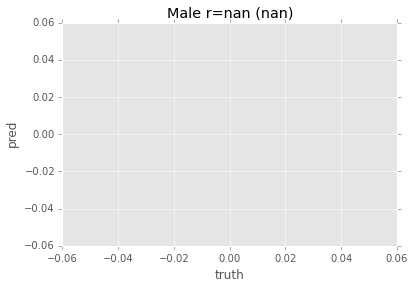

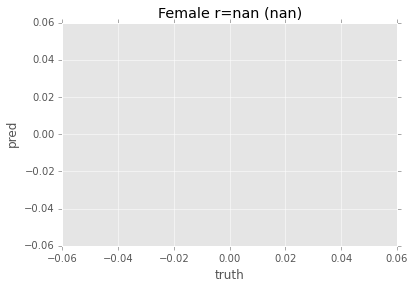

Top Coefficients for Male
pos:51263592 (2.7e+02) 26257166 (2.4e+02) 2557521 (2.2e+02) 28870086 (1.9e+02) 10671602 (1.9e+02) 32765534 (1.8e+02) 18927441 (1.7e+02) 36362259 (1.7e+02) 13213122 (1.7e+02) 32135704 (1.6e+02)
neg:15846407 (-3.5e+02) 19397785 (-3.5e+02) 21324258 (-2.3e+02) 25087685 (-2.2e+02) 15131310 (-2.2e+02) 38531995 (-2.1e+02) 106837463 (-1.9e+02) 20710809 (-1.8e+02) 11522502 (-1.8e+02) 25589776 (-1.8e+02)
Top Coefficients for Female
pos:15846407 (3.5e+02) 19397785 (3.5e+02) 21324258 (2.3e+02) 25087685 (2.2e+02) 15131310 (2.2e+02) 38531995 (2.1e+02) 106837463 (1.9e+02) 20710809 (1.8e+02) 11522502 (1.8e+02) 25589776 (1.8e+02)
neg:51263592 (-2.7e+02) 26257166 (-2.4e+02) 2557521 (-2.2e+02) 28870086 (-1.9e+02) 10671602 (-1.9e+02) 32765534 (-1.8e+02) 18927441 (-1.7e+02) 36362259 (-1.7e+02) 13213122 (-1.7e+02) 32135704 (-1.6e+02)
average correlation= nan
CPU times: user 8.12 s, sys: 229 ms, total: 8.35 s
Wall time: 8.62 s


([nan, nan],
 {'Gender': {'model': MultiTaskElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001,
              fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=10,
              n_jobs=1, normalize=False, random_state=None,
              selection='cyclic', tol=0.0001, verbose=0),
   'preds': [],
   'truths': []}})

In [90]:
# Find best ElasticNet params on small subset.
outputs_g = {'Gender': ['Male', 'Female']} # just search for gender.
sample_size = 200

def get_model_cv():
    return MultiTaskElasticNetCV(l1_ratio=0.5, n_alphas=10)

# For followers
%time do_cv(X[:sample_size], outputs_g, fol_feats, brand_ids[:sample_size], n_folds=0, model_f=get_model_cv)

predicting ['Male', 'Female'] for 198 brands
alpha chosen= 0.0145983148674 l1ratio chosen= 0.5


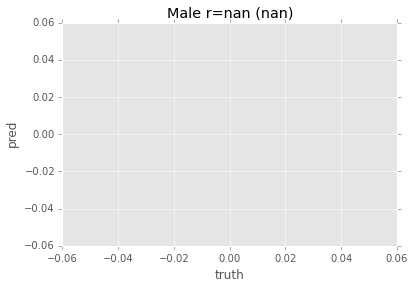

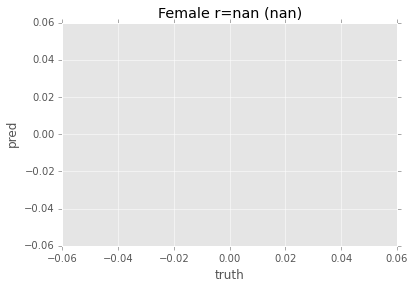

Top Coefficients for Male
pos:nice (4.5) man (4.2) point (3.9) fuck (3.5) bro (3.4) shit (3.4) guy (3.3) guys (3.2) dude (3.2) david (3.2)
neg:her (-7.6) cute (-5.6) girls (-5.4) baby (-4.6) family (-4.6) omg (-4.6) she (-4.5) hair (-4.4) excited (-4.3) girl (-4.2)
Top Coefficients for Female
pos:her (7.6) cute (5.6) girls (5.4) baby (4.6) family (4.6) omg (4.6) she (4.5) hair (4.4) excited (4.3) girl (4.2)
neg:nice (-4.5) man (-4.2) point (-3.9) fuck (-3.5) bro (-3.4) shit (-3.4) guy (-3.3) guys (-3.2) dude (-3.2) david (-3.2)
average correlation= nan
CPU times: user 7min 44s, sys: 1.89 s, total: 7min 46s
Wall time: 7min 50s


([nan, nan],
 {'Gender': {'model': MultiTaskElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001,
              fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=10,
              n_jobs=1, normalize=False, random_state=None,
              selection='cyclic', tol=0.0001, verbose=0),
   'preds': [],
   'truths': []}})

In [91]:
# For text
%time do_cv(X_text[:sample_size], outputs_g, text_feats, brand_ids[:sample_size], n_folds=0, model_f=get_model_cv)

predicting ['Male', 'Female'] for 198 brands
alpha chosen= 0.0145983148674 l1ratio chosen= 0.5


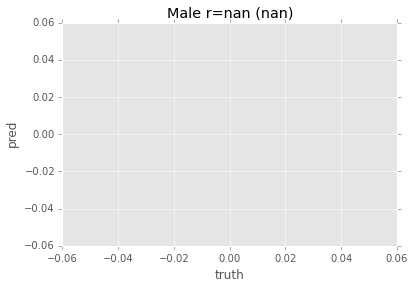

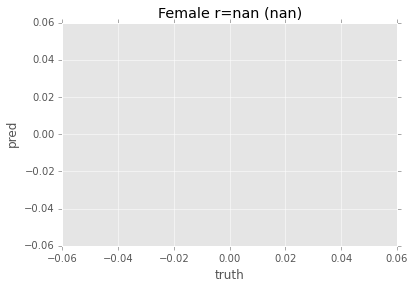

Top Coefficients for Male
pos:nice (4.5) man (4.2) point (3.9) fuck (3.5) bro (3.4) shit (3.4) guy (3.3) guys (3.2) dude (3.2) david (3.2)
neg:her (-7.6) cute (-5.6) girls (-5.4) baby (-4.6) family (-4.6) omg (-4.6) she (-4.5) hair (-4.4) excited (-4.3) girl (-4.2)
Top Coefficients for Female
pos:her (7.6) cute (5.6) girls (5.4) baby (4.6) family (4.6) omg (4.6) she (4.5) hair (4.4) excited (4.3) girl (4.2)
neg:nice (-4.5) man (-4.2) point (-3.9) fuck (-3.5) bro (-3.4) shit (-3.4) guy (-3.3) guys (-3.2) dude (-3.2) david (-3.2)
average correlation= nan
CPU times: user 10min 45s, sys: 2.56 s, total: 10min 47s
Wall time: 10min 53s


([nan, nan],
 {'Gender': {'model': MultiTaskElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001,
              fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=10,
              n_jobs=1, normalize=False, random_state=None,
              selection='cyclic', tol=0.0001, verbose=0),
   'preds': [],
   'truths': []}})

In [92]:
# For text + followers
%time do_cv(X_both[:sample_size], outputs_g, all_feats, brand_ids[:sample_size], n_folds=0, model_f=get_model_cv)

predicting ['Male', 'Female'] for 1066 brands
fitting on 852 training and 214 testing instances
fitting on 853 training and 213 testing instances
fitting on 853 training and 213 testing instances
fitting on 853 training and 213 testing instances
fitting on 853 training and 213 testing instances


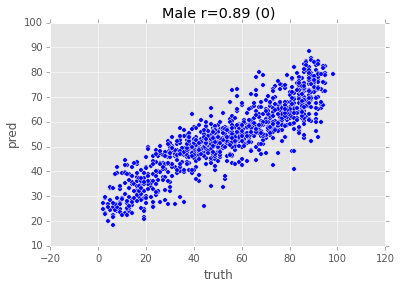

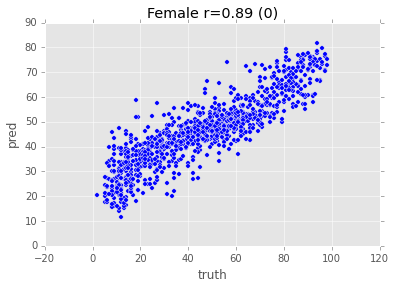

Top Coefficients for Male
pos:51263592 (3.6e+02) 26257166 (3.3e+02) 2557521 (3.1e+02) 28870086 (2.5e+02) 1344951 (2.5e+02) 10671602 (2.4e+02) 32765534 (2.4e+02) 19426551 (2.3e+02) 36362259 (2.2e+02) 13213122 (2.2e+02)
neg:15846407 (-6.2e+02) 19397785 (-5.5e+02) 21324258 (-4e+02) 106837463 (-3.7e+02) 11522502 (-3.4e+02) 20710809 (-3.3e+02) 15131310 (-3.3e+02) 38531995 (-3.2e+02) 25589776 (-3.1e+02) 25087685 (-3.1e+02)
Top Coefficients for Female
pos:15846407 (6.2e+02) 19397785 (5.5e+02) 21324258 (4e+02) 106837463 (3.7e+02) 11522502 (3.4e+02) 20710809 (3.3e+02) 15131310 (3.3e+02) 38531995 (3.2e+02) 25589776 (3.1e+02) 25087685 (3.1e+02)
neg:51263592 (-3.6e+02) 26257166 (-3.3e+02) 2557521 (-3.1e+02) 28870086 (-2.5e+02) 1344951 (-2.5e+02) 10671602 (-2.4e+02) 32765534 (-2.4e+02) 19426551 (-2.3e+02) 36362259 (-2.2e+02) 13213122 (-2.2e+02)
predicting ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'] for 1072 brands
fitting on 857 training and 215 testing instances
fitting on 857 training an

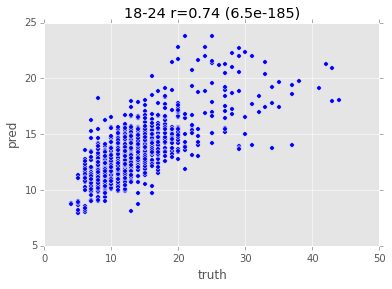

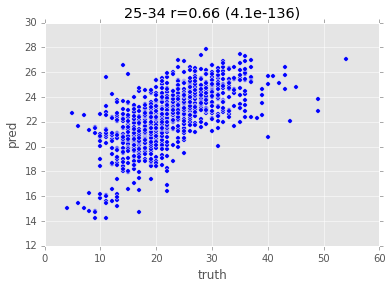

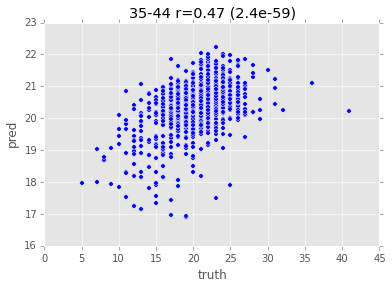

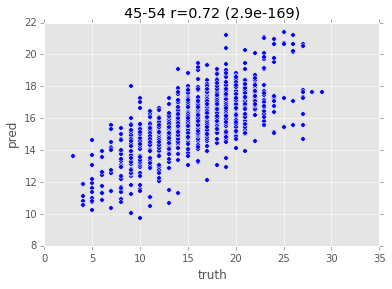

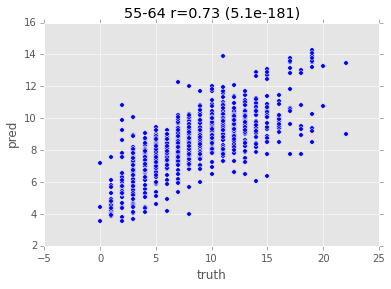

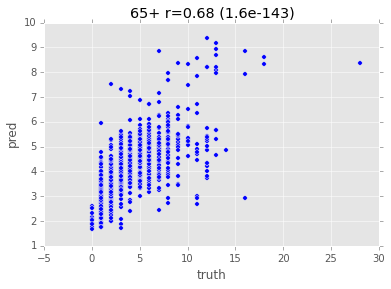

Top Coefficients for 18-24
pos:18927441 (85) 10671602 (85) 29758446 (83) 14922225 (73) 36803580 (72) 24742040 (70) 15234657 (66) 39538010 (62) 5162861 (61) 7157132 (59)
neg:428333 (-1.1e+02) 1367531 (-86) 51241574 (-82) 30313925 (-66) 759251 (-64) 28785486 (-64) 3108351 (-63) 15012486 (-61) 15224867 (-60) 2467791 (-59)
Top Coefficients for 25-34
pos:6480682 (83) 22027186 (71) 31080039 (68) 23544596 (67) 1344951 (58) 169686021 (55) 14089195 (54) 972651 (52) 2735591 (51) 16303106 (51)
neg:1367531 (-1.3e+02) 428333 (-1.1e+02) 28785486 (-84) 51241574 (-81) 15012486 (-80) 759251 (-78) 10228272 (-72) 30313925 (-70) 14173315 (-68) 15754281 (-67)
Top Coefficients for 35-44
pos:428333 (38) 813286 (25) 51241574 (24) 16331010 (24) 2557521 (23) 816653 (23) 759251 (22) 19426551 (20) 14372486 (20) 51263592 (20)
neg:5162861 (-34) 36803580 (-32) 29758446 (-30) 10671602 (-30) 14922225 (-29) 39538010 (-29) 18927441 (-29) 24742040 (-27) 10228272 (-26) 309366491 (-26)
Top Coefficients for 45-54
pos:136753

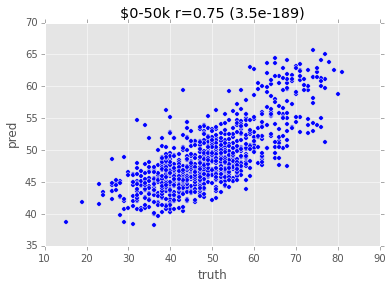

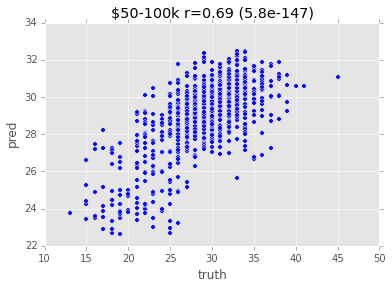

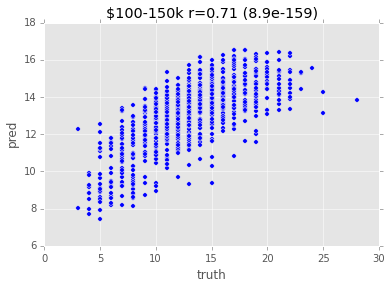

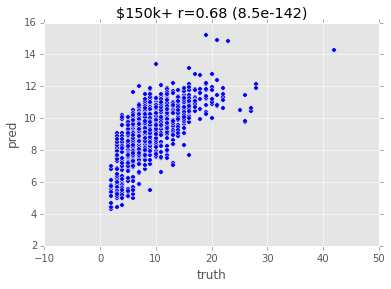

Top Coefficients for $0-50k
pos:10228272 (1.5e+02) 10671602 (1.3e+02) 18927441 (1.2e+02) 29758446 (1.2e+02) 27195114 (1.1e+02) 23151437 (1e+02) 14922225 (1e+02) 23561980 (98) 24742040 (98) 15234657 (95)
neg:3108351 (-1.8e+02) 807095 (-1.3e+02) 2467791 (-1.2e+02) 51263592 (-1.2e+02) 5988062 (-1.2e+02) 51241574 (-1.1e+02) 91478624 (-1.1e+02) 2557521 (-1.1e+02) 120943272 (-1.1e+02) 26257166 (-1.1e+02)
Top Coefficients for $50-100k
pos:51263592 (48) 428333 (48) 26257166 (47) 2557521 (45) 120943272 (44) 51241574 (42) 15485441 (42) 1367531 (40) 19426551 (39) 5392522 (37)
neg:10671602 (-56) 29758446 (-53) 10228272 (-51) 18927441 (-49) 27195114 (-47) 14922225 (-45) 23561980 (-44) 15234657 (-43) 24742040 (-42) 5162861 (-40)
Top Coefficients for $100-150k
pos:3108351 (59) 2557521 (45) 51263592 (44) 26257166 (44) 120943272 (41) 5988062 (41) 2467791 (39) 807095 (38) 91478624 (37) 51241574 (34)
neg:10228272 (-45) 10671602 (-38) 18927441 (-37) 23151437 (-36) 29758446 (-35) 27195114 (-34) 79293791 (-

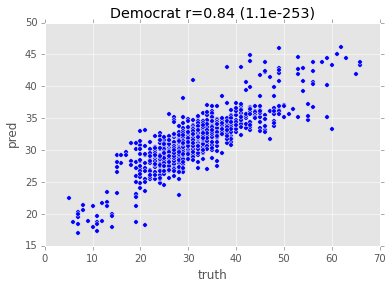

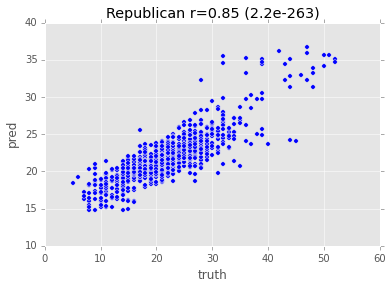

Top Coefficients for Democrat
pos:813286 (1.3e+02) 19397785 (1.2e+02) 14677919 (1e+02) 25110374 (98) 409486555 (94) 16129920 (92) 1339835893 (91) 18220175 (88) 27195114 (88) 17169320 (87)
neg:1367531 (-1.5e+02) 15976697 (-96) 14669951 (-95) 110445334 (-91) 17454769 (-90) 41634520 (-89) 26257166 (-88) 10168082 (-88) 2557521 (-85) 65493023 (-84)
Top Coefficients for Republican
pos:1367531 (1.7e+02) 15976697 (1e+02) 41634520 (1e+02) 110445334 (1e+02) 14669951 (97) 17454769 (97) 65493023 (96) 10168082 (95) 50055701 (95) 166270127 (93)
neg:813286 (-97) 14677919 (-93) 16303106 (-70) 158414847 (-69) 22027186 (-69) 1344951 (-68) 16129920 (-65) 19725644 (-64) 1339835893 (-61) 19697415 (-61)
predicting ['No College', 'College', 'Grad School'] for 1046 brands
fitting on 836 training and 210 testing instances
fitting on 837 training and 209 testing instances
fitting on 837 training and 209 testing instances
fitting on 837 training and 209 testing instances
fitting on 837 training and 209 testing i

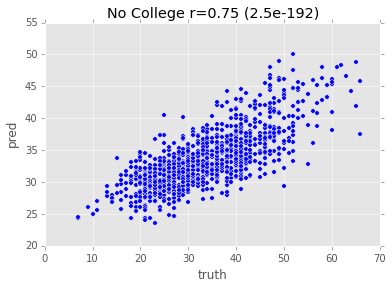

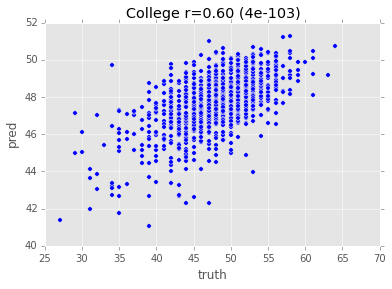

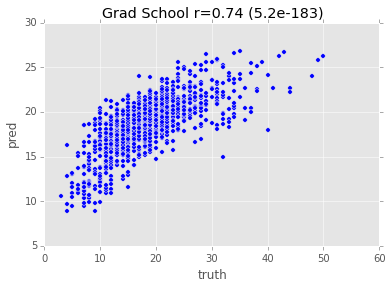

Top Coefficients for No College
pos:10228272 (1.9e+02) 10671602 (1.4e+02) 29758446 (1.3e+02) 24742040 (1.2e+02) 18927441 (1.2e+02) 21447363 (1.1e+02) 14922225 (1.1e+02) 15234657 (1.1e+02) 23151437 (1e+02) 36803580 (92)
neg:14677919 (-1.6e+02) 16303106 (-1.6e+02) 807095 (-1.5e+02) 5988062 (-1.4e+02) 3108351 (-1.4e+02) 5392522 (-1.3e+02) 972651 (-1.2e+02) 1344951 (-1.2e+02) 16017475 (-1.1e+02) 2735591 (-1.1e+02)
Top Coefficients for College
pos:16303106 (64) 1344951 (62) 115485051 (60) 972651 (59) 22027186 (55) 6480682 (51) 14075928 (49) 2735591 (48) 30364057 (47) 14353392 (46)
neg:10228272 (-78) 10671602 (-63) 29758446 (-59) 24742040 (-53) 14922225 (-49) 15234657 (-47) 18927441 (-47) 36803580 (-40) 39538010 (-38) 17092592 (-38)
Top Coefficients for Grad School
pos:807095 (1.3e+02) 3108351 (1.3e+02) 14677919 (1.2e+02) 5988062 (1.2e+02) 2467791 (1.1e+02) 5392522 (1e+02) 16017475 (95) 16303106 (91) 1339835893 (85) 1330457336 (81)
neg:10228272 (-1.1e+02) 10671602 (-78) 21447363 (-76) 297584

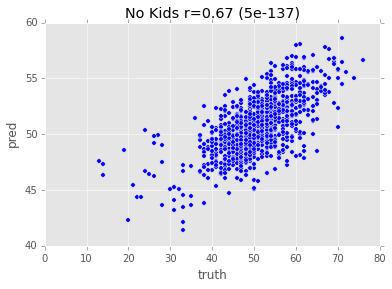

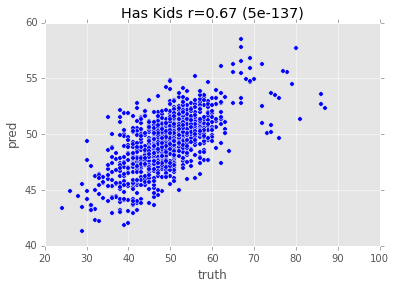

Top Coefficients for No Kids
pos:14677919 (1.2e+02) 16303106 (83) 807095 (80) 16129920 (75) 14089195 (73) 22027186 (70) 158414847 (68) 14075928 (67) 15164565 (66) 19697415 (65)
neg:18784113 (-1.1e+02) 29730065 (-1e+02) 16581734 (-82) 15846407 (-77) 14709355 (-76) 94919897 (-76) 36782022 (-75) 16492009 (-75) 14206711 (-72) 10228272 (-72)
Top Coefficients for Has Kids
pos:18784113 (1.1e+02) 29730065 (1e+02) 16581734 (82) 15846407 (77) 14709355 (76) 94919897 (76) 36782022 (75) 16492009 (75) 14206711 (72) 10228272 (72)
neg:14677919 (-1.2e+02) 16303106 (-83) 807095 (-80) 16129920 (-75) 14089195 (-73) 22027186 (-70) 158414847 (-68) 14075928 (-67) 15164565 (-66) 19697415 (-65)
predicting ['Caucasian', 'Hispanic', 'African American', 'Asian'] for 1035 brands
fitting on 828 training and 207 testing instances
fitting on 828 training and 207 testing instances
fitting on 828 training and 207 testing instances
fitting on 828 training and 207 testing instances
fitting on 828 training and 207 testing

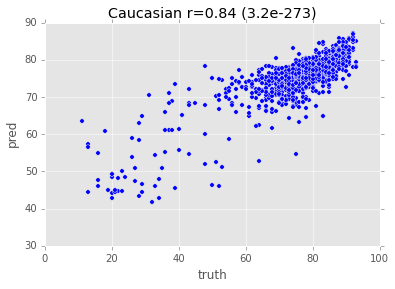

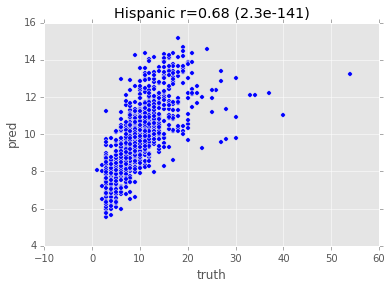

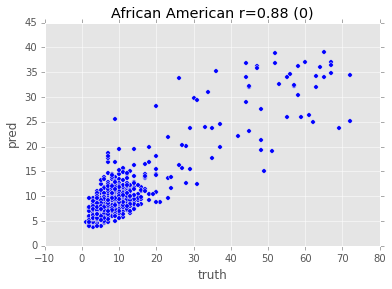

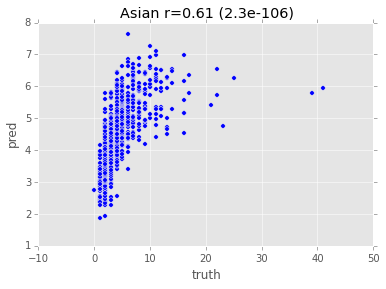

Top Coefficients for Caucasian
pos:15485441 (1.7e+02) 1367531 (1.6e+02) 14920785 (1.6e+02) 15846407 (1.5e+02) 14075928 (1.5e+02) 25521487 (1.5e+02) 16303106 (1.5e+02) 115485051 (1.3e+02) 120943272 (1.2e+02) 14824849 (1.2e+02)
neg:27195114 (-2.2e+02) 23561980 (-2.1e+02) 23151437 (-2e+02) 18220175 (-1.9e+02) 338084918 (-1.9e+02) 117778179 (-1.9e+02) 19028953 (-1.8e+02) 17169320 (-1.8e+02) 25110374 (-1.8e+02) 17929027 (-1.7e+02)
Top Coefficients for Hispanic
pos:16664681 (61) 20346956 (60) 16374678 (59) 23043294 (56) 10252962 (50) 1059194370 (50) 17379685 (48) 10228272 (46) 85603854 (43) 10671602 (41)
neg:15485441 (-54) 14920785 (-53) 1367531 (-53) 120943272 (-52) 16303106 (-49) 428333 (-48) 14075928 (-45) 71023061 (-43) 51263592 (-43) 51241574 (-42)
Top Coefficients for African American
pos:23151437 (2e+02) 27195114 (1.8e+02) 117778179 (1.7e+02) 18220175 (1.7e+02) 25110374 (1.7e+02) 23561980 (1.7e+02) 17169320 (1.6e+02) 84358766 (1.6e+02) 18278629 (1.6e+02) 19028953 (1.6e+02)
neg:1154850

In [95]:
# Results using followers alone:
def get_model_fol():
    return MultiTaskElasticNet(alpha=1e-5, l1_ratio=0.5)

correlations_fol, category_results_fol = do_cv(X, outputs, fol_feats, brand_ids, model_f=get_model_fol)

predicting ['Male', 'Female'] for 1066 brands
fitting on 852 training and 214 testing instances
fitting on 853 training and 213 testing instances
fitting on 853 training and 213 testing instances
fitting on 853 training and 213 testing instances
fitting on 853 training and 213 testing instances


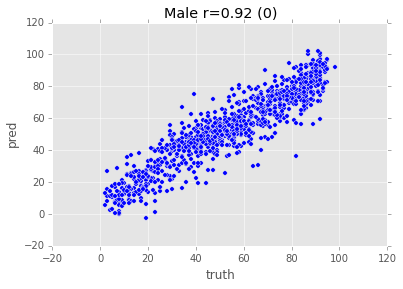

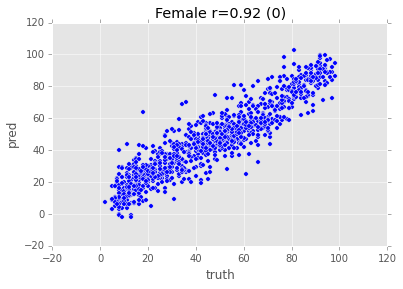

Top Coefficients for Male
pos:film (5.3) guy (5.2) gay (4.9) man (4.5) fuck (4.5) game (4.2) team (4) internet (3.9) review (3.9) guys (3.8)
neg:hair (-6.4) her (-6) omg (-5.5) family (-5.5) girl (-5.2) she (-5.1) girls (-5.1) cute (-4.6) beautiful (-4.5) thinking (-4.3)
Top Coefficients for Female
pos:hair (6.4) her (6) omg (5.5) family (5.5) girl (5.2) she (5.1) girls (5.1) cute (4.6) beautiful (4.5) thinking (4.3)
neg:film (-5.3) guy (-5.2) gay (-4.9) man (-4.5) fuck (-4.5) game (-4.2) team (-4) internet (-3.9) review (-3.9) guys (-3.8)
predicting ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'] for 1072 brands
fitting on 857 training and 215 testing instances
fitting on 857 training and 215 testing instances
fitting on 858 training and 214 testing instances
fitting on 858 training and 214 testing instances
fitting on 858 training and 214 testing instances


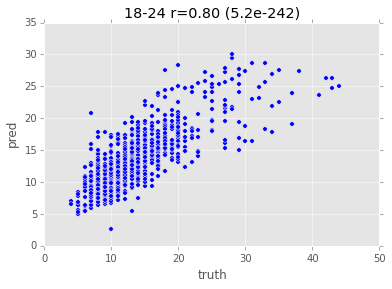

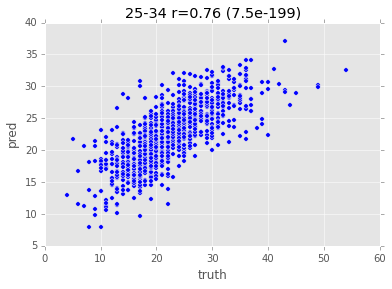

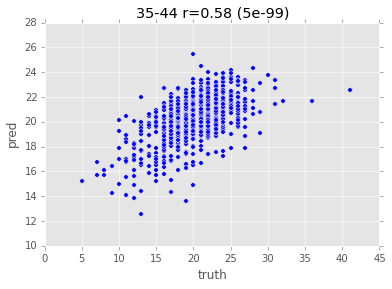

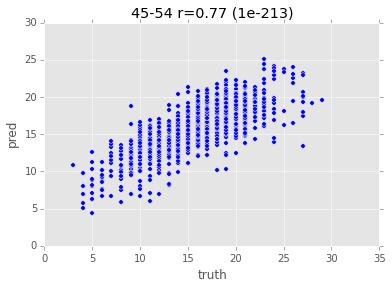

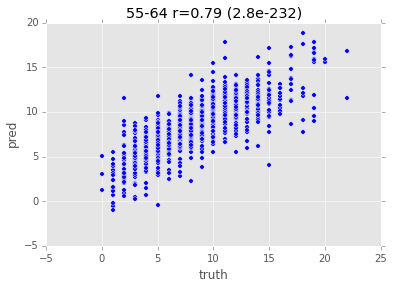

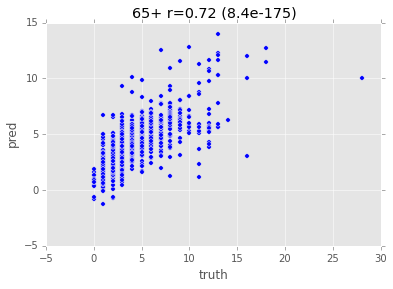

Top Coefficients for 18-24
pos:d (2.7) haha (2.3) album (1.9) x (1.7) xd (1.6) _: (1.5) actually (1.5) stream (1.5) wanna (1.5) im (1.5)
neg:family (-1.8) wow (-1.5) miss (-1.4) vote (-1.3) great (-1.3) fans (-1.2) tv (-1.2) kids (-1.2) son (-1.1) star (-1.1)
Top Coefficients for 25-34
pos:super (3.3) dc (2.7) baby (2.4) definitely (2.3) nba (2.2) pregnancy (2.1) wedding (2) even (2) entire (1.9) nyc (1.9)
neg:american (-2.5) county (-2.3) vote (-2.3) MENTION_youtube (-2.2) golf (-2.1) red (-1.7) july (-1.7) tour (-1.7) dog (-1.7) am (-1.6)
Top Coefficients for 35-44
pos:star (1.4) fans (1.2) kids (1.2) tv (1.1) bike (1) mind (0.96) store (0.96) awesome (0.95) screen (0.93) son (0.92)
neg:haha (-1.8) d (-1.7) MENTION_youtube (-1.7) album (-1.4) wanna (-1.4) national (-1.2) nintendo (-1.2) golf (-1.2) xd (-1.1) games (-1.1)
Top Coefficients for 45-54
pos:wow (1.4) vote (1.4) american (1.2) comes (1.2) ca (1.1) santa (1) county (1) boys (1) nice (0.97) high (0.95)
neg:super (-1.6) damn (

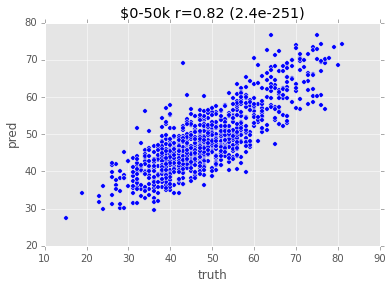

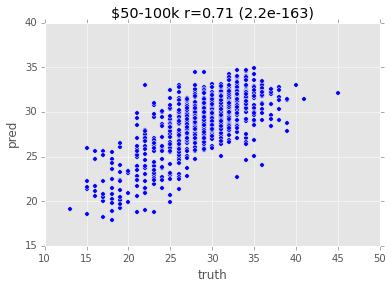

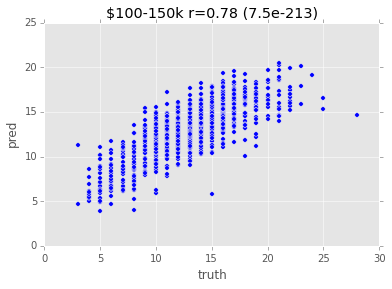

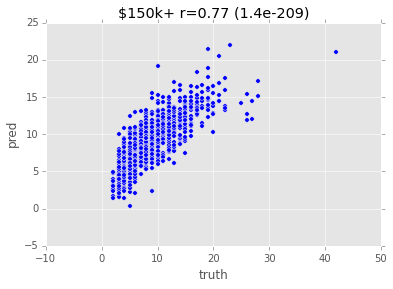

Top Coefficients for $0-50k
pos:lol (3.7) games (3.4) MENTION_youtube (3.1) damn (3.1) black (2.8) ps9 (2.7) side (2.7) d (2.7) community (2.6) god (2.5)
neg:dc (-3.1) santa (-2.8) looks (-2.5) nice (-2.5) luck (-2.4) iphone (-2.4) boys (-2.4) nyc (-2.3) congrats (-2.3) MENTION_wsj (-2.2)
Top Coefficients for $50-100k
pos:great (1.1) seattle (1.1) he (1.1) performance (0.9) lose (0.89) usa (0.89) kansas (0.88) iphone (0.85) wow (0.84) cold (0.84)
neg:games (-1.5) damn (-1.3) ps9 (-1.2) black (-1.2) past (-1.2) they're (-1.2) video (-1.1) d (-1.1) MENTION_youtube (-1.1) music (-1)
Top Coefficients for $100-150k
pos:santa (1.1) flight (1.1) nice (1.1) looks (1) practice (0.95) congrats (0.94) bike (0.93) dc (0.89) retweet (0.86) ride (0.86)
neg:lol (-1.3) indiana (-1.2) being (-1.2) games (-1.1) community (-1.1) side (-1.1) MENTION_youtube (-1.1) art (-1) damn (-1) episode (-0.96)
Top Coefficients for $150k+
pos:dc (2.2) nyc (2.1) market (1.8) MENTION_wsj (1.8) congrats (1.7) beach (1.3)

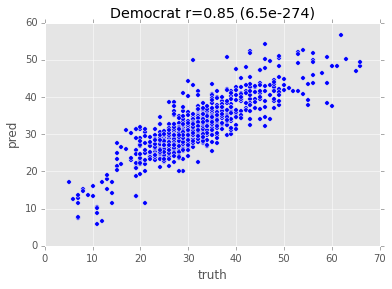

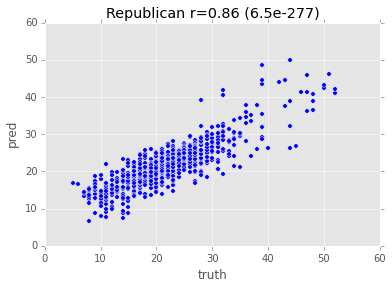

Top Coefficients for Democrat
pos:women (3) u (2.8) ain't (2.6) nyc (2.6) equality (2.5) la (2.3) voice (2.2) seattle (2.2) dc (2.2) MENTION_nytimes (2.2)
neg:HASHTAG_tcot (-3.4) MENTION_foxnews (-3.3) country (-3) guy (-2.9) golf (-2.4) christmas (-2.4) luck (-2.1) isis (-2.1) HASHTAG_pjnet (-1.8) government (-1.8)
Top Coefficients for Republican
pos:MENTION_foxnews (3.9) christmas (3.3) HASHTAG_tcot (3.1) football (2.8) county (1.9) morning (1.9) family (1.9) christians (1.8) country (1.8) obama's (1.7)
neg:boston (-3.2) equality (-2.3) seattle (-2.1) fuck (-2.1) shit (-2.1) portland (-1.9) MENTION_nytimes (-1.8) women (-1.7) street (-1.7) black (-1.7)
predicting ['No College', 'College', 'Grad School'] for 1046 brands
fitting on 836 training and 210 testing instances
fitting on 837 training and 209 testing instances
fitting on 837 training and 209 testing instances
fitting on 837 training and 209 testing instances
fitting on 837 training and 209 testing instances


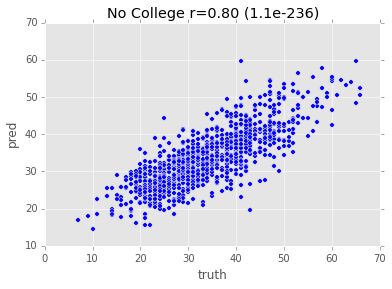

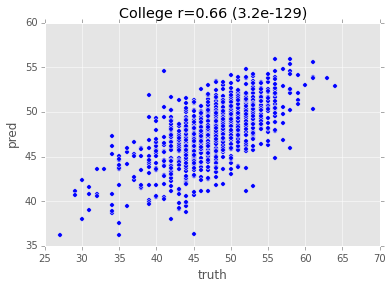

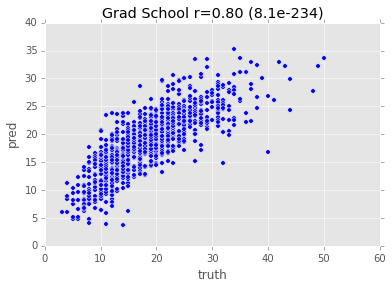

Top Coefficients for No College
pos:lol (4.3) games (3.1) put (3) MENTION_youtube (3) county (3) made (2.8) ps9 (2.5) xbox (2.4) videos (2.3) found (2.2)
neg:la (-3) our (-3) market (-2.8) running (-2.6) MENTION_nytimes (-2.6) probably (-2.5) seattle (-2.4) run (-2.1) bag (-2.1) congrats (-2.1)
Top Coefficients for College
pos:our (2) you're (1.7) seattle (1.7) photo (1.6) MENTION_mashable (1.5) la (1.5) apple (1.5) fashion (1.5) probably (1.4) san (1.4)
neg:am (-1.6) games (-1.6) its (-1.6) xbox (-1.5) u (-1.5) chicago (-1.5) county (-1.5) videos (-1.5) im (-1.5) ur (-1.4)
Top Coefficients for Grad School
pos:dc (2.6) MENTION_nytimes (2.4) market (2.2) which (2.1) review (2) excellent (1.9) boston (1.9) also (1.9) congrats (1.9) MENTION_washingtonpost (1.8)
neg:lol (-3.1) MENTION_youtube (-2.6) made (-2.2) put (-2.1) july (-1.7) video (-1.6) road (-1.5) released (-1.5) county (-1.5) games (-1.5)
predicting ['No Kids', 'Has Kids'] for 1052 brands
fitting on 841 training and 211 testing

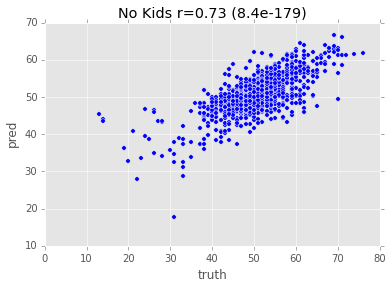

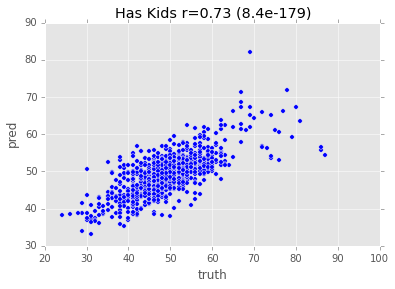

Top Coefficients for No Kids
pos:care (2.9) street (2.6) gay (2.4) years (2.3) health (2.3) drink (2.2) dc (2.2) white (2.2) ht… (2.1) album (2.1)
neg:kids (-5.7) school (-4.1) child (-3.3) family (-2.8) kid (-2.8) daughter (-2.7) children (-2.7) utah (-2.6) moms (-2.4) parents (-2.4)
Top Coefficients for Has Kids
pos:kids (5.7) school (4.1) child (3.3) family (2.8) kid (2.8) daughter (2.7) children (2.7) utah (2.6) moms (2.4) parents (2.4)
neg:care (-2.9) street (-2.6) gay (-2.4) years (-2.3) health (-2.3) drink (-2.2) dc (-2.2) white (-2.2) ht… (-2.1) album (-2.1)
predicting ['Caucasian', 'Hispanic', 'African American', 'Asian'] for 1035 brands
fitting on 828 training and 207 testing instances
fitting on 828 training and 207 testing instances
fitting on 828 training and 207 testing instances
fitting on 828 training and 207 testing instances
fitting on 828 training and 207 testing instances


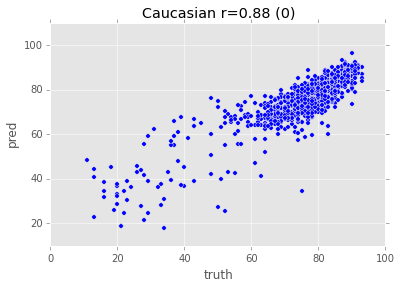

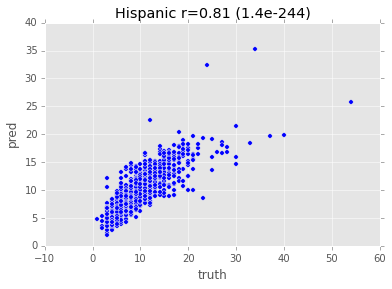

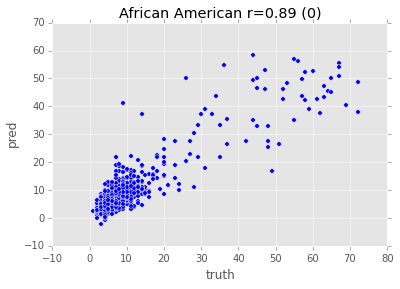

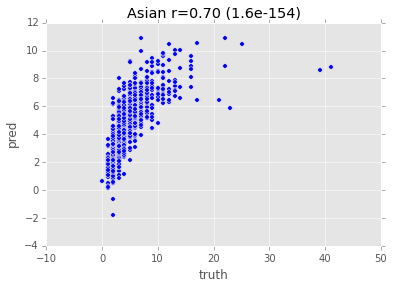

Top Coefficients for Caucasian
pos:christmas (4.1) fun (3.6) dog (3.2) country (3.1) st (3) could (2.9) luck (2.9) guy (2.8) florida (2.8) john (2.6)
neg:lol (-5.9) la (-5.7) black (-5.3) u (-4.3) bout (-4.2) san (-3.9) lil (-3.9) ain't (-3.8) lakers (-3.6) kobe (-3.2)
Top Coefficients for Hispanic
pos:la (4.7) los (4) san (3.5) el (3.2) angeles (2.7) california (2.1) ca (1.8) lol (1.8) l.a (1.7) lakers (1.7)
neg:st (-1.3) florida (-1.3) national (-1.2) snow (-1.1) ohio (-1.1) perfect (-1.1) luck (-1.1) twitter (-1) atlanta (-1) ncaa (-1)
Top Coefficients for African American
pos:black (5.4) lol (4.2) bout (3.8) ain't (3.8) brown (3.5) lil (3.3) african (3.2) blessed (3.1) smh (3) atlanta (3)
neg:guys (-3.2) fun (-3) guy (-3) amazing (-2.8) christmas (-2.4) lt;9 (-2.3) country (-2.3) haha (-2.2) holy (-2.1) band (-2)
Top Coefficients for Asian
pos:chinese (1.8) la (1.8) sf (1.7) san (1.6) china (1.5) korea (1.5) india (1.4) bay (1.3) vs (1.3) hi (1.2)
neg:st (-1.3) dog (-1.2) page (-1)

In [96]:
# Results using text alone:
def get_model_text():
    return MultiTaskElasticNet(alpha=1e-2, l1_ratio=0.5)
correlations_text, category_results_text = do_cv(X_text, outputs, text_feats, brand_ids, model_f=get_model_text)

predicting ['Male', 'Female'] for 1066 brands
fitting on 852 training and 214 testing instances
fitting on 853 training and 213 testing instances
fitting on 853 training and 213 testing instances
fitting on 853 training and 213 testing instances
fitting on 853 training and 213 testing instances


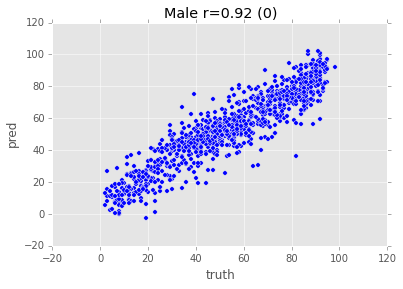

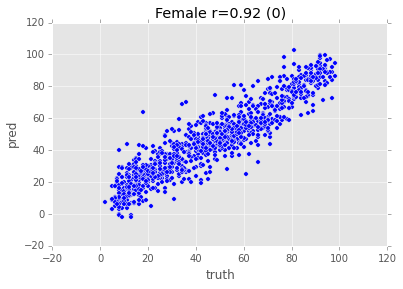

Top Coefficients for Male
pos:film (5.3) guy (5.2) gay (4.9) man (4.5) fuck (4.5) game (4.2) team (4) internet (3.9) review (3.9) guys (3.8)
neg:hair (-6.4) her (-6) omg (-5.5) family (-5.5) girl (-5.2) she (-5.1) girls (-5.1) cute (-4.6) beautiful (-4.5) thinking (-4.3)
Top Coefficients for Female
pos:hair (6.4) her (6) omg (5.5) family (5.5) girl (5.2) she (5.1) girls (5.1) cute (4.6) beautiful (4.5) thinking (4.3)
neg:film (-5.3) guy (-5.2) gay (-4.9) man (-4.5) fuck (-4.5) game (-4.2) team (-4) internet (-3.9) review (-3.9) guys (-3.8)
predicting ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'] for 1072 brands
fitting on 857 training and 215 testing instances
fitting on 857 training and 215 testing instances
fitting on 858 training and 214 testing instances
fitting on 858 training and 214 testing instances
fitting on 858 training and 214 testing instances


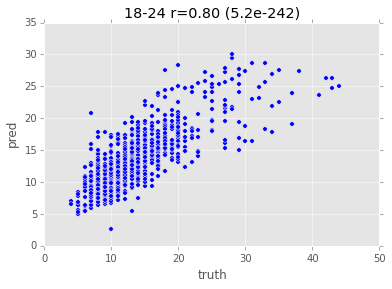

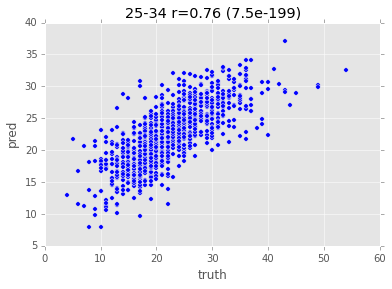

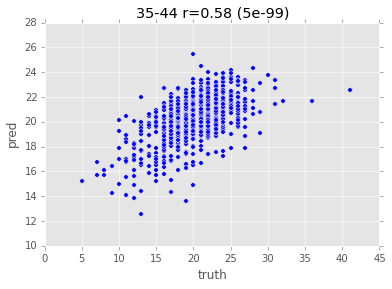

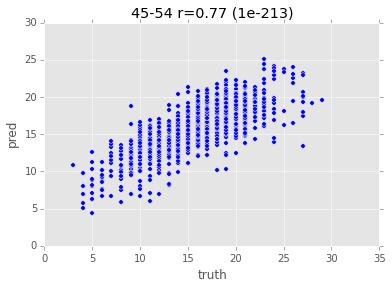

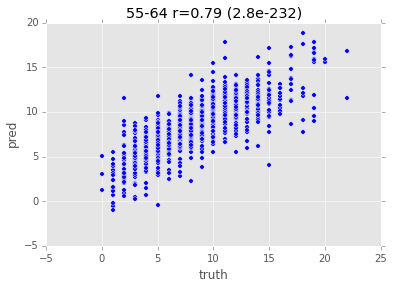

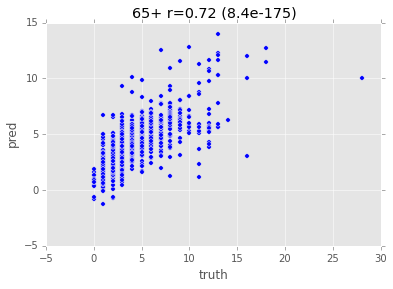

Top Coefficients for 18-24
pos:d (2.7) haha (2.3) album (1.9) x (1.7) xd (1.6) _: (1.5) actually (1.5) stream (1.5) wanna (1.5) im (1.5)
neg:family (-1.8) wow (-1.5) miss (-1.4) vote (-1.3) great (-1.3) fans (-1.2) tv (-1.2) kids (-1.2) son (-1.1) star (-1.1)
Top Coefficients for 25-34
pos:super (3.3) dc (2.7) baby (2.4) definitely (2.3) nba (2.2) pregnancy (2.1) wedding (2) even (2) entire (1.9) nyc (1.9)
neg:american (-2.5) county (-2.3) vote (-2.3) MENTION_youtube (-2.2) golf (-2.1) red (-1.7) july (-1.7) tour (-1.7) dog (-1.7) am (-1.6)
Top Coefficients for 35-44
pos:star (1.4) fans (1.2) kids (1.2) tv (1.1) bike (1) mind (0.96) store (0.96) awesome (0.95) screen (0.93) son (0.92)
neg:haha (-1.8) d (-1.7) MENTION_youtube (-1.7) album (-1.4) wanna (-1.4) national (-1.2) nintendo (-1.2) golf (-1.2) xd (-1.1) games (-1.1)
Top Coefficients for 45-54
pos:wow (1.4) vote (1.4) american (1.2) comes (1.2) ca (1.1) santa (1) county (1) boys (1) nice (0.97) high (0.95)
neg:super (-1.6) damn (

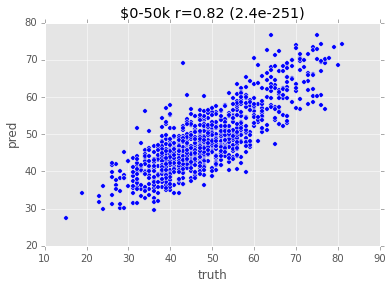

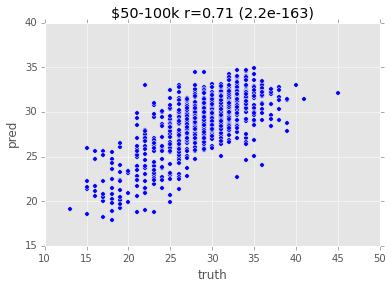

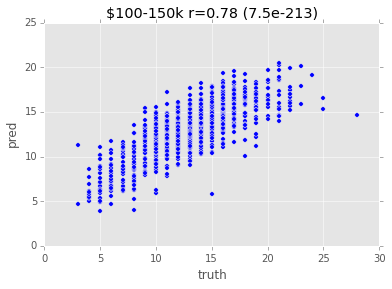

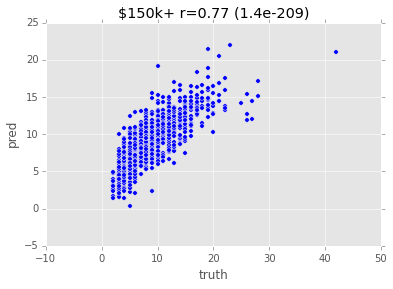

Top Coefficients for $0-50k
pos:lol (3.7) games (3.4) MENTION_youtube (3.1) damn (3.1) black (2.8) ps9 (2.7) side (2.7) d (2.7) community (2.6) god (2.5)
neg:dc (-3.1) santa (-2.8) looks (-2.5) nice (-2.5) luck (-2.4) iphone (-2.4) boys (-2.4) nyc (-2.3) congrats (-2.3) MENTION_wsj (-2.2)
Top Coefficients for $50-100k
pos:great (1.1) seattle (1.1) he (1.1) performance (0.9) lose (0.89) usa (0.89) kansas (0.88) iphone (0.85) wow (0.84) cold (0.84)
neg:games (-1.5) damn (-1.3) ps9 (-1.2) black (-1.2) past (-1.2) they're (-1.2) video (-1.1) d (-1.1) MENTION_youtube (-1.1) music (-1)
Top Coefficients for $100-150k
pos:santa (1.1) flight (1.1) nice (1.1) looks (1) practice (0.95) congrats (0.94) bike (0.93) dc (0.89) retweet (0.86) ride (0.86)
neg:lol (-1.3) indiana (-1.2) being (-1.2) games (-1.1) community (-1.1) side (-1.1) MENTION_youtube (-1.1) art (-1) damn (-1) episode (-0.96)
Top Coefficients for $150k+
pos:dc (2.2) nyc (2.1) market (1.8) MENTION_wsj (1.8) congrats (1.7) beach (1.3)

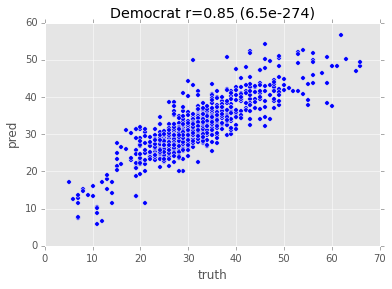

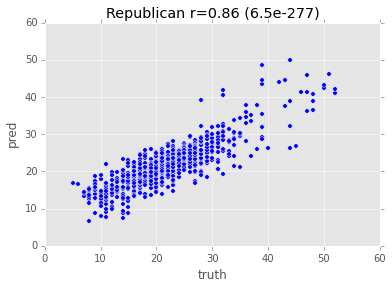

Top Coefficients for Democrat
pos:women (3) u (2.8) ain't (2.6) nyc (2.6) equality (2.5) la (2.3) voice (2.2) seattle (2.2) dc (2.2) MENTION_nytimes (2.2)
neg:HASHTAG_tcot (-3.4) MENTION_foxnews (-3.3) country (-3) guy (-2.9) golf (-2.4) christmas (-2.4) luck (-2.1) isis (-2.1) HASHTAG_pjnet (-1.8) government (-1.8)
Top Coefficients for Republican
pos:MENTION_foxnews (3.9) christmas (3.3) HASHTAG_tcot (3.1) football (2.8) county (1.9) morning (1.9) family (1.9) christians (1.8) country (1.8) obama's (1.7)
neg:boston (-3.2) equality (-2.3) seattle (-2.1) fuck (-2.1) shit (-2.1) portland (-1.9) MENTION_nytimes (-1.8) women (-1.7) street (-1.7) black (-1.7)
predicting ['No College', 'College', 'Grad School'] for 1046 brands
fitting on 836 training and 210 testing instances
fitting on 837 training and 209 testing instances
fitting on 837 training and 209 testing instances
fitting on 837 training and 209 testing instances
fitting on 837 training and 209 testing instances


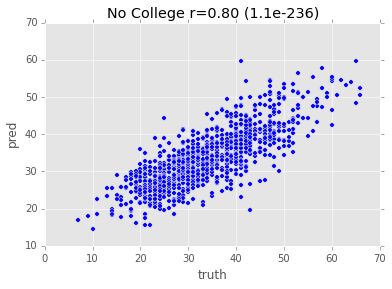

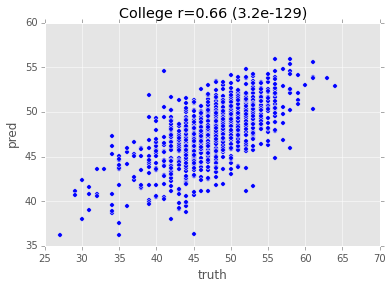

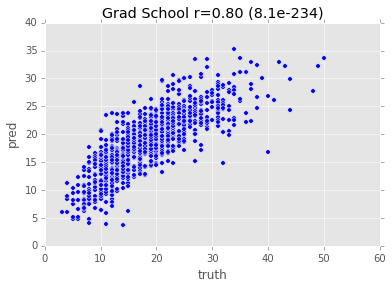

Top Coefficients for No College
pos:lol (4.3) games (3.1) put (3) MENTION_youtube (3) county (3) made (2.8) ps9 (2.5) xbox (2.4) videos (2.3) found (2.2)
neg:la (-3) our (-3) market (-2.8) running (-2.6) MENTION_nytimes (-2.6) probably (-2.5) seattle (-2.4) run (-2.1) bag (-2.1) congrats (-2.1)
Top Coefficients for College
pos:our (2) you're (1.7) seattle (1.7) photo (1.6) MENTION_mashable (1.5) la (1.5) apple (1.5) fashion (1.5) probably (1.4) san (1.4)
neg:am (-1.6) games (-1.6) its (-1.6) xbox (-1.5) u (-1.5) chicago (-1.5) county (-1.5) videos (-1.5) im (-1.5) ur (-1.4)
Top Coefficients for Grad School
pos:dc (2.6) MENTION_nytimes (2.4) market (2.2) which (2.1) review (2) excellent (1.9) boston (1.9) also (1.9) congrats (1.9) MENTION_washingtonpost (1.8)
neg:lol (-3.1) MENTION_youtube (-2.6) made (-2.2) put (-2.1) july (-1.7) video (-1.6) road (-1.5) released (-1.5) county (-1.5) games (-1.5)
predicting ['No Kids', 'Has Kids'] for 1052 brands
fitting on 841 training and 211 testing

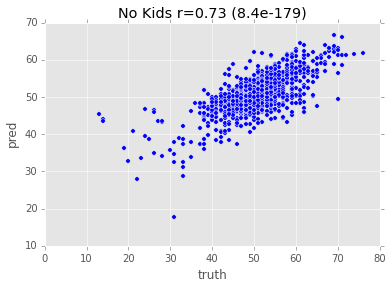

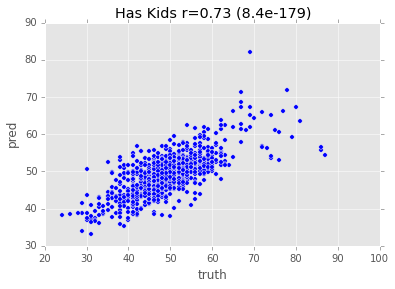

Top Coefficients for No Kids
pos:care (2.9) street (2.6) gay (2.4) years (2.3) health (2.3) drink (2.2) dc (2.2) white (2.2) ht… (2.1) album (2.1)
neg:kids (-5.7) school (-4.1) child (-3.3) family (-2.8) kid (-2.8) daughter (-2.7) children (-2.7) utah (-2.6) moms (-2.4) parents (-2.4)
Top Coefficients for Has Kids
pos:kids (5.7) school (4.1) child (3.3) family (2.8) kid (2.8) daughter (2.7) children (2.7) utah (2.6) moms (2.4) parents (2.4)
neg:care (-2.9) street (-2.6) gay (-2.4) years (-2.3) health (-2.3) drink (-2.2) dc (-2.2) white (-2.2) ht… (-2.1) album (-2.1)
predicting ['Caucasian', 'Hispanic', 'African American', 'Asian'] for 1035 brands
fitting on 828 training and 207 testing instances
fitting on 828 training and 207 testing instances
fitting on 828 training and 207 testing instances
fitting on 828 training and 207 testing instances
fitting on 828 training and 207 testing instances


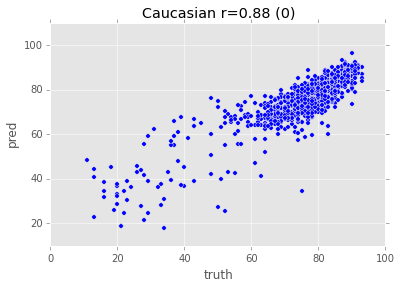

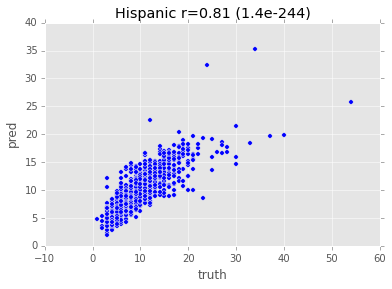

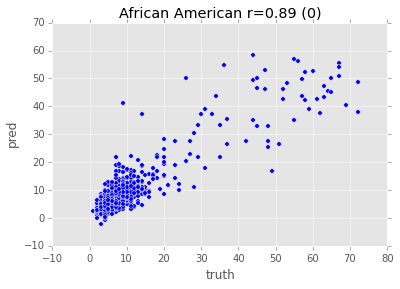

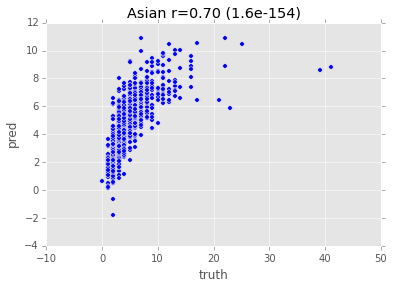

Top Coefficients for Caucasian
pos:christmas (4.1) fun (3.6) dog (3.2) country (3.1) st (3) could (2.9) luck (2.9) guy (2.8) florida (2.8) john (2.6)
neg:lol (-5.9) la (-5.7) black (-5.3) u (-4.3) bout (-4.2) san (-3.9) lil (-3.9) ain't (-3.8) lakers (-3.6) kobe (-3.2)
Top Coefficients for Hispanic
pos:la (4.7) los (4) san (3.5) el (3.2) angeles (2.7) california (2.1) ca (1.8) lol (1.8) l.a (1.7) lakers (1.7)
neg:st (-1.3) florida (-1.3) national (-1.2) snow (-1.1) ohio (-1.1) perfect (-1.1) luck (-1.1) twitter (-1) atlanta (-1) ncaa (-1)
Top Coefficients for African American
pos:black (5.4) lol (4.2) bout (3.8) ain't (3.8) brown (3.5) lil (3.3) african (3.2) blessed (3.1) smh (3) atlanta (3)
neg:guys (-3.2) fun (-3) guy (-3) amazing (-2.8) christmas (-2.4) lt;9 (-2.3) country (-2.3) haha (-2.2) holy (-2.1) band (-2)
Top Coefficients for Asian
pos:chinese (1.8) la (1.8) sf (1.7) san (1.6) china (1.5) korea (1.5) india (1.4) bay (1.3) vs (1.3) hi (1.2)
neg:st (-1.3) dog (-1.2) page (-1)

In [97]:
# Results using text and followers:
def get_model_both():
    return MultiTaskElasticNet(alpha=1e-2, l1_ratio=0.5)
correlations_both, category_results_both = do_cv(X_both2, outputs, all_feats, brand_ids, model_f=get_model_both)

In [154]:
# Save all results.
cPickle.dump((correlations_text, category_results_text, 
              correlations_fol, category_results_fol,
              correlations_both, category_results_both,
              correlations_both2, category_results_both2),
             open('data/results.pkl', 'wb'))

In [146]:
# Try standardizing both matrix
X_both2 = scale(X_both)

predicting ['Male', 'Female'] for 98 brands
alpha chosen= 0.0630532626745 l1ratio chosen= 0.5


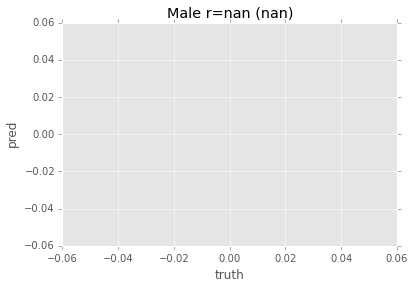

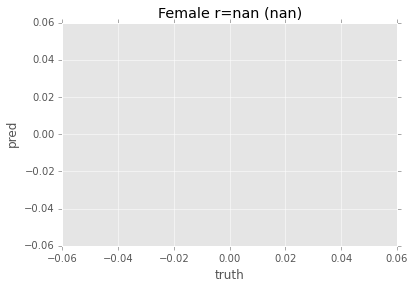

Top Coefficients for Male
pos:MENTION_bleacherreport (0.74) MENTION_theonion (0.68) 18948541 (0.45) MENTION_gamezoneonline (0.39) MENTION_politicalwire (0.37) MENTION_simpsonsqotd (0.37) MENTION_techreview (0.34) 23504870 (0.28) 22027186 (0.28) MENTION_darpa (0.24)
neg:MENTION_peoplemag (-0.83) 20012204 (-0.47) 2148071 (-0.42) MENTION_bulletproofexec (-0.41) 18833982 (-0.39) 97739866 (-0.38) 21681809 (-0.35) 19675493 (-0.35) 2883841 (-0.34) 32959253 (-0.34)
Top Coefficients for Female
pos:MENTION_peoplemag (0.83) 20012204 (0.47) 2148071 (0.42) MENTION_bulletproofexec (0.41) 18833982 (0.39) 97739866 (0.38) 21681809 (0.35) 19675493 (0.35) 2883841 (0.34) 32959253 (0.34)
neg:MENTION_bleacherreport (-0.74) MENTION_theonion (-0.68) 18948541 (-0.45) MENTION_gamezoneonline (-0.39) MENTION_politicalwire (-0.37) MENTION_simpsonsqotd (-0.37) MENTION_techreview (-0.34) 23504870 (-0.28) 22027186 (-0.28) MENTION_darpa (-0.24)
average correlation= nan
CPU times: user 8min 4s, sys: 4.77 s, total: 8min

([nan, nan],
 {'Gender': {'model': MultiTaskElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001,
              fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=10,
              n_jobs=1, normalize=False, random_state=None,
              selection='cyclic', tol=0.0001, verbose=0),
   'preds': [],
   'truths': []}})

In [147]:
%time do_cv(X_both2[:100], outputs_g, all_feats, brand_ids[:100], n_folds=0, model_f=get_model_cv)

predicting ['Male', 'Female'] for 1066 brands
fitting on 852 training and 214 testing instances
fitting on 853 training and 213 testing instances
fitting on 853 training and 213 testing instances
fitting on 853 training and 213 testing instances
fitting on 853 training and 213 testing instances


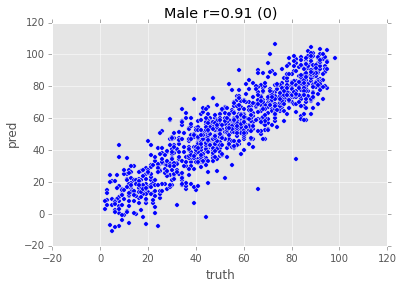

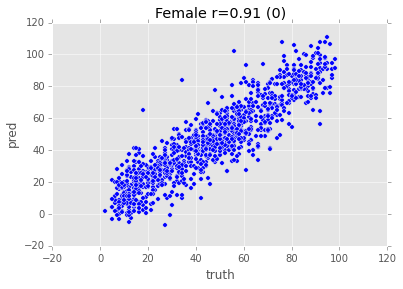

Top Coefficients for Male
pos:2557521 (1.2) 19397785 (0.88) 819800 (0.81) 7302282 (0.77) 17454769 (0.59) 1344951 (0.56) 742143 (0.51) 7563792 (0.51) 4081481 (0.49) ousted (0.48)
neg:7025662 (-1.2) 268439864 (-1) 15846407 (-0.91) 14230524 (-0.83) 2390651 (-0.76) 9541782 (-0.71) 16190898 (-0.7) 1507651 (-0.69) 1495901 (-0.69) 6427882 (-0.67)
Top Coefficients for Female
pos:7025662 (1.2) 268439864 (1) 15846407 (0.91) 14230524 (0.83) 2390651 (0.76) 9541782 (0.71) 16190898 (0.7) 1507651 (0.69) 1495901 (0.69) 6427882 (0.67)
neg:2557521 (-1.2) 19397785 (-0.88) 819800 (-0.81) 7302282 (-0.77) 17454769 (-0.59) 1344951 (-0.56) 742143 (-0.51) 7563792 (-0.51) 4081481 (-0.49) ousted (-0.48)
predicting ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'] for 1072 brands
fitting on 857 training and 215 testing instances
fitting on 857 training and 215 testing instances
fitting on 858 training and 214 testing instances
fitting on 858 training and 214 testing instances
fitting on 858 training and 214 te

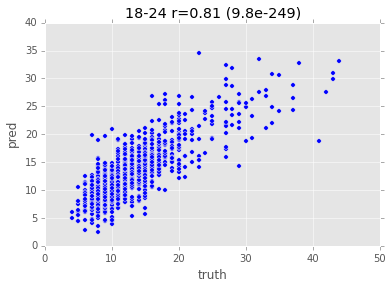

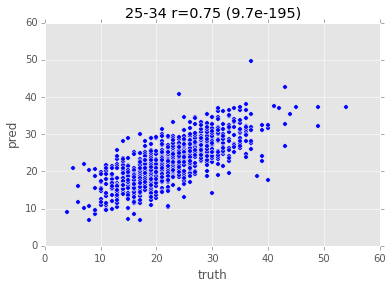

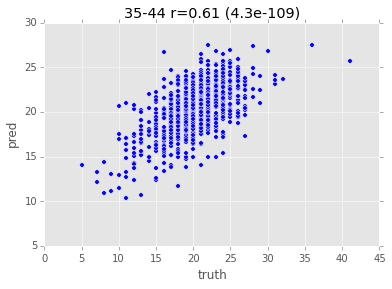

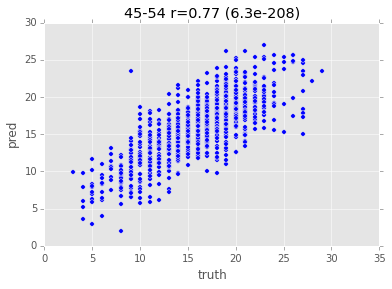

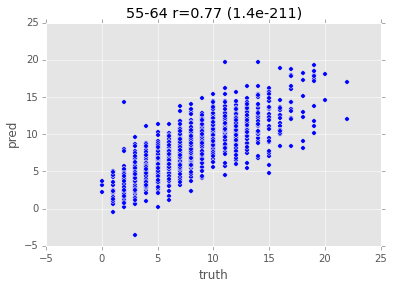

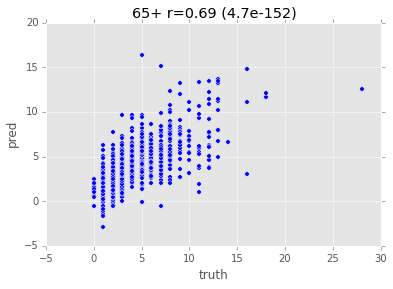

Top Coefficients for 18-24
pos:19397785 (0.38) MENTION_hotnewhiphop (0.36) MENTION_asapferg (0.25) MENTION_collegehumor (0.24) 166739404 (0.23) 23375688 (0.2) MENTION_theonion (0.2) HASHTAG_tsm (0.2) 138185168 (0.19) HASHTAG_lnsm (0.19)
neg:17919972 (-0.87) 14075928 (-0.44) 16312576 (-0.32) MENTION_breakingnews (-0.2) 5988062 (-0.19) tour… (-0.14) HASHTAG_jimmykimmel (-0.13) MENTION_todayshow (-0.12) MENTION_toylandgiz (-0.12) “MENTION_peoplemag (-0.12)
Top Coefficients for 25-34
pos:MENTION_theonion (0.44) 27993589 (0.38) 6017542 (0.29) MENTION_gawker (0.29) 19397785 (0.28) MENTION_esqtv (0.24) MENTION_gothamist (0.21) MENTION_dcist (0.19) co-sign (0.19) MENTION_onionsports (0.18)
neg:14075928 (-0.47) 16312576 (-0.33) MENTION_breakingnews (-0.24) MENTION_gdelaurentiis (-0.19) 17546958 (-0.17) MENTION_themowglis (-0.15) MENTION_cnbc (-0.14) moscone (-0.13) 17784293 (-0.13) overshadows (-0.13)
Top Coefficients for 35-44
pos:17919972 (0.18) 20447988 (0.16) 2883841 (0.13) 5988062 (0.13) M

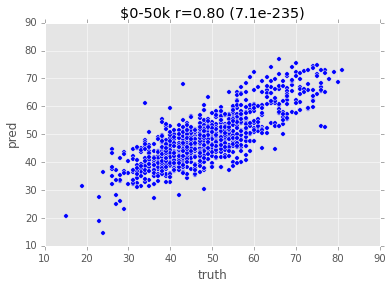

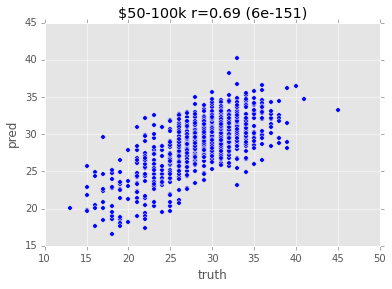

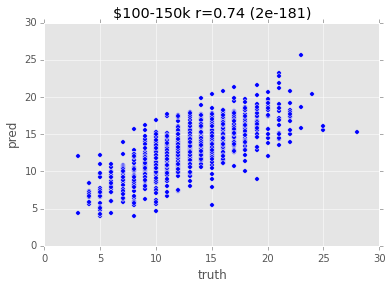

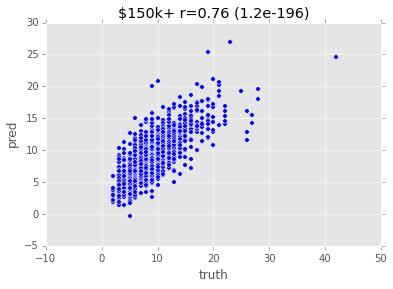

Top Coefficients for $0-50k
pos:MENTION_womenshealthmag (0.36) 19397785 (0.33) 25589776 (0.32) 16589495 (0.3) MENTION_nmnh (0.27) temptations (0.27) MENTION_thoughtcatalog (0.27) sext (0.26) MENTION_mental_floss (0.25) estimation (0.24)
neg:16312576 (-0.85) 14075928 (-0.59) 9300262 (-0.42) 28370738 (-0.4) 17454769 (-0.29) MENTION_anaheimducks (-0.28) MENTION_breakingnews (-0.28) MENTION_justinjbariso (-0.26) secret's (-0.24) 25087685 (-0.23)
Top Coefficients for $50-100k
pos:14075928 (0.31) 17919972 (0.26) 16312576 (0.19) MENTION_breakingnews (0.16) mattresses (0.14) MENTION_espn9999 (0.13) surviving (0.13) 28370738 (0.13) MENTION_tmz (0.12) 5988062 (0.12)
neg:19397785 (-0.29) 16589495 (-0.2) 34352940 (-0.14) sext (-0.13) estimation (-0.12) deviantart (-0.12) 14573745 (-0.12) MENTION_lkrauss9 (-0.12) MENTION_latoyajackson (-0.11) shmoney (-0.11)
Top Coefficients for $100-150k
pos:16312576 (0.31) 14075928 (0.17) 5988062 (0.15) 17454769 (0.15) 28370738 (0.14) landy (0.14) MENTION_justinj

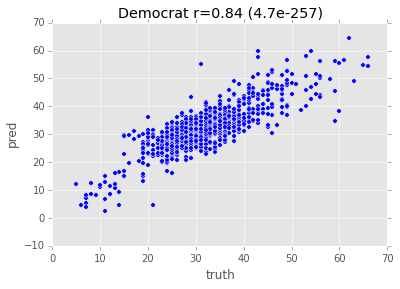

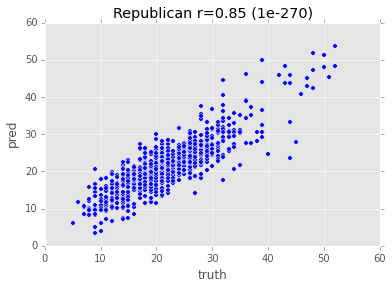

Top Coefficients for Democrat
pos:MENTION_globalgrind (0.36) 2520748074 (0.35) HASHTAG_charlestonsyllabus (0.23) 268439864 (0.22) crankin (0.22) 6587402 (0.21) 17169320 (0.21) HASHTAG_breakfastclub (0.19) MENTION_kevinhart9real (0.19) 14934818 (0.18)
neg:14669951 (-0.27) “MENTION_entmagazine (-0.24) 7713202 (-0.23) 7402662 (-0.23) MENTION_thehill (-0.21) setters (-0.21) veranda (-0.19) “MENTION_politico (-0.17) milling (-0.16) 20447988 (-0.16)
Top Coefficients for Republican
pos:5988062 (0.49) 14669951 (0.3) 5693842 (0.24) 7713202 (0.24) MENTION_thehill (0.22) MENTION_southpark (0.21) 7402662 (0.21) 10774652 (0.21) 7597712 (0.2) regione (0.2)
neg:MENTION_theonion (-0.31) MENTION_eclecticbrotha (-0.22) 17169320 (-0.2) 16303106 (-0.17) 2520748074 (-0.17) festival's (-0.15) 20402945 (-0.15) badawi (-0.15) MENTION_timothypmurphy (-0.14) footnotes (-0.14)
predicting ['No College', 'College', 'Grad School'] for 1046 brands
fitting on 836 training and 210 testing instances
fitting on 837 trai

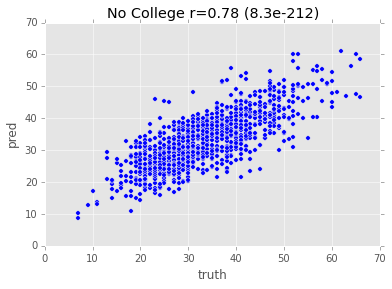

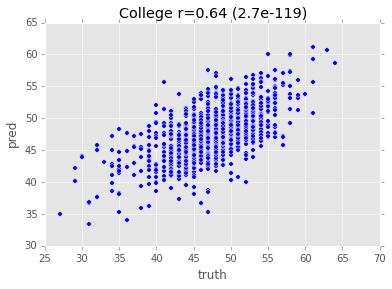

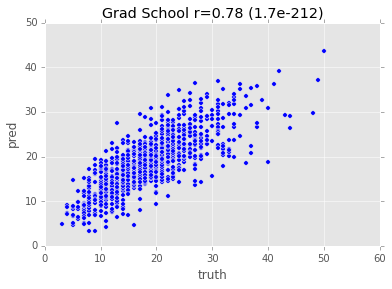

Top Coefficients for No College
pos:25589776 (0.46) 17842366 (0.36) MENTION_womenshealthmag (0.3) MENTION_bankruptingam (0.29) MENTION_thoughtcatalog (0.29) 32625314 (0.26) giada (0.25) chow (0.24) geeez (0.24) 16810796 (0.23)
neg:16312576 (-0.89) 17471979 (-0.52) 3108351 (-0.37) 9300262 (-0.36) 28370738 (-0.36) 14934818 (-0.35) 4898091 (-0.34) 17454769 (-0.29) 16303106 (-0.28) HASHTAG_southwest (-0.28)
Top Coefficients for College
pos:5988062 (0.62) 14934818 (0.44) 16312576 (0.42) 17471979 (0.26) 1344951 (0.21) HASHTAG_turkeyday (0.19) MENTION_adweek (0.19) MENTION_jksports (0.17) HASHTAG_southwest (0.17) with.” (0.17)
neg:giada (-0.21) MENTION_theeconomist (-0.19) MENTION_trengriffin (-0.19) 25589776 (-0.19) 32625314 (-0.18) pedersen (-0.18) MENTION_mofakr_eng (-0.15) geeez (-0.15) 17842366 (-0.15) 19397785 (-0.15)
Top Coefficients for Grad School
pos:3108351 (0.54) 16312576 (0.45) 9300262 (0.41) 4898091 (0.34) 28370738 (0.29) MENTION_richlowry (0.25) 17471979 (0.25) 17454769 (0.25) 

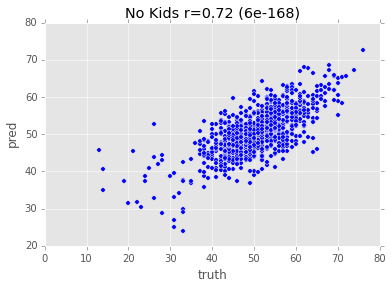

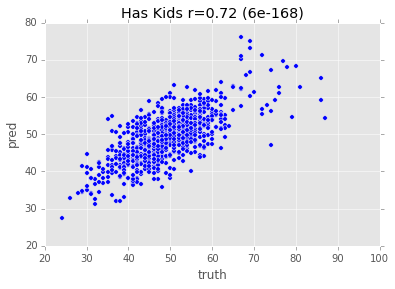

Top Coefficients for No Kids
pos:9300262 (0.3) 11348282 (0.25) MENTION_hotelchatter (0.23) flamingo (0.22) HASHTAG_pride9999 (0.22) alturas (0.21) 25087685 (0.21) MENTION_flarefashion (0.21) MENTION_fab (0.2) 8161232 (0.2)
neg:19397785 (-0.56) hijacking (-0.28) 17471979 (-0.27) peppa (-0.27) 361329018 (-0.27) 64565898 (-0.25) middle-school (-0.25) drifted (-0.24) MENTION_socialinnewyork (-0.24) idea… (-0.24)
Top Coefficients for Has Kids
pos:19397785 (0.56) hijacking (0.28) 17471979 (0.27) peppa (0.27) 361329018 (0.27) 64565898 (0.25) middle-school (0.25) drifted (0.24) MENTION_socialinnewyork (0.24) idea… (0.24)
neg:9300262 (-0.3) 11348282 (-0.25) MENTION_hotelchatter (-0.23) flamingo (-0.22) HASHTAG_pride9999 (-0.22) alturas (-0.21) 25087685 (-0.21) MENTION_flarefashion (-0.21) MENTION_fab (-0.2) 8161232 (-0.2)
predicting ['Caucasian', 'Hispanic', 'African American', 'Asian'] for 1035 brands
fitting on 828 training and 207 testing instances
fitting on 828 training and 207 testing ins

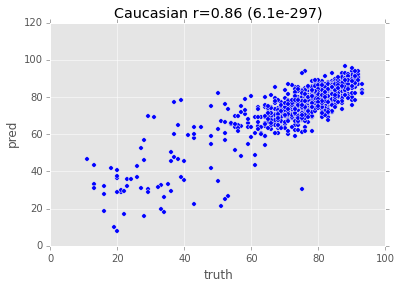

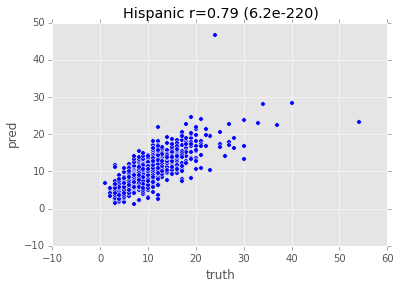

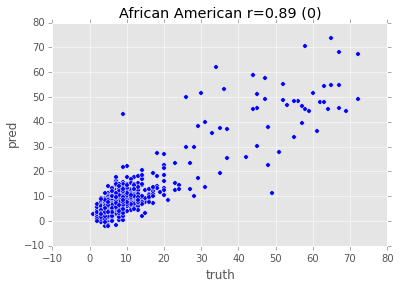

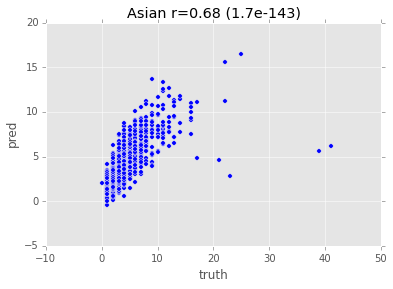

Top Coefficients for Caucasian
pos:5988062 (0.67) 16312576 (0.45) MENTION_rollingstone (0.41) g'morning (0.3) 20012204 (0.3) 16877611 (0.3) MENTION_theseanhayes (0.29) 25087685 (0.23) 7713202 (0.22) MENTION_combat_jack (0.22)
neg:8320242 (-0.81) 9591442 (-0.7) 9051482 (-0.61) 11912362 (-0.59) 12266442 (-0.51) 8318902 (-0.43) 9695312 (-0.4) 8399972 (-0.38) 9402372 (-0.38) MENTION_blackgirlscode (-0.37)
Top Coefficients for Hispanic
pos:fucken (0.27) 14780915 (0.24) 24346793 (0.22) 6587402 (0.21) MENTION_lakersnation (0.19) 9695312 (0.17) 11912362 (0.16) 1428219750 (0.15) MENTION_nickswagypyoung (0.15) motivated (0.15)
neg:5988062 (-0.39) 16312576 (-0.26) 16877611 (-0.22) MENTION_rollingstone (-0.2) 25087685 (-0.18) MENTION_globalgrind (-0.13) MENTION_theseanhayes (-0.12) 20012204 (-0.12) MENTION_lilbibby (-0.12) HASHTAG_rivalrynight (-0.12)
Top Coefficients for African American
pos:9591442 (0.6) 9051482 (0.6) 8320242 (0.59) 12266442 (0.44) 11912362 (0.43) 16560657 (0.34) 9402372 (0.29) 

In [148]:
# Re-run after scaling X_both:
correlations_both2, category_results_both2 = do_cv(X_both2, outputs, all_feats, brand_ids, model_f=get_model_both)

In [690]:
# Repeat with ridge.
# Followers:
def get_model_ridge():
    return Ridge(.1)
   
_, _ = do_cv(X, outputs, fol_feats, brand_ids, model_f=get_model_ridge, verbose=False)

predicting ['Male', 'Female'] for 1066 brands
predicting ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'] for 1072 brands
predicting ['$0-50k', '$50-100k', '$100-150k', '$150k+'] for 1043 brands
predicting ['Democrat', 'Republican'] for 957 brands
predicting ['No College', 'College', 'Grad School'] for 1046 brands
predicting ['No Kids', 'Has Kids'] for 1052 brands
predicting ['Caucasian', 'Hispanic', 'African American', 'Asian'] for 1035 brands
average correlation= 0.616772561728
ridge/fol avg cor= 0.616772561728


In [691]:
# Repeat with ridge.
# Text
_, _ = do_cv(X_text, outputs, text_feats, brand_ids, model_f=get_model_ridge, verbose=False)

predicting ['Male', 'Female'] for 1066 brands
predicting ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'] for 1072 brands
predicting ['$0-50k', '$50-100k', '$100-150k', '$150k+'] for 1043 brands
predicting ['Democrat', 'Republican'] for 957 brands
predicting ['No College', 'College', 'Grad School'] for 1046 brands
predicting ['No Kids', 'Has Kids'] for 1052 brands
predicting ['Caucasian', 'Hispanic', 'African American', 'Asian'] for 1035 brands
average correlation= 0.787670646642
ridge/text avg cor= 0.787670646642


In [693]:
# Repeat with ridge.
# Both
_, _ = do_cv(X_both2, outputs, all_feats, brand_ids, model_f=get_model_ridge, verbose=False)

predicting ['Male', 'Female'] for 1066 brands
predicting ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'] for 1072 brands
predicting ['$0-50k', '$50-100k', '$100-150k', '$150k+'] for 1043 brands
predicting ['Democrat', 'Republican'] for 957 brands
predicting ['No College', 'College', 'Grad School'] for 1046 brands
predicting ['No Kids', 'Has Kids'] for 1052 brands
predicting ['Caucasian', 'Hispanic', 'African American', 'Asian'] for 1035 brands
average correlation= 0.781744714588
ridge/both avg cor= 0.781744714588


In [694]:
# Repeat with ElasticNet
def get_model_en_fol():
    return ElasticNet(alpha=1e-5, l1_ratio=0.5)

def get_model_en_text():
    return ElasticNet(alpha=1e-2, l1_ratio=0.5)

print '\nFriends:'
_, _ = do_cv(X, outputs, fol_feats, brand_ids, model_f=get_model_en_fol, verbose=False)
print '\nText:'
_, _ = do_cv(X_text, outputs, text_feats, brand_ids, model_f=get_model_en_text, verbose=False)
print '\nFriends+Text:'
_, _ = do_cv(X_both2, outputs, all_feats, brand_ids, model_f=get_model_en_text, verbose=False)


Friends:
predicting ['Male', 'Female'] for 1066 brands
predicting ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'] for 1072 brands
predicting ['$0-50k', '$50-100k', '$100-150k', '$150k+'] for 1043 brands
predicting ['Democrat', 'Republican'] for 957 brands
predicting ['No College', 'College', 'Grad School'] for 1046 brands
predicting ['No Kids', 'Has Kids'] for 1052 brands
predicting ['Caucasian', 'Hispanic', 'African American', 'Asian'] for 1035 brands
average correlation= 0.723985351747

Text:
predicting ['Male', 'Female'] for 1066 brands
predicting ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'] for 1072 brands
predicting ['$0-50k', '$50-100k', '$100-150k', '$150k+'] for 1043 brands
predicting ['Democrat', 'Republican'] for 957 brands
predicting ['No College', 'College', 'Grad School'] for 1046 brands
predicting ['No Kids', 'Has Kids'] for 1052 brands
predicting ['Caucasian', 'Hispanic', 'African American', 'Asian'] for 1035 brands
average correlation= 0.776186232441

Frie

** Average correlation: **

Links alone:
- Ridge: .617
- Elastic Net: .724
- Multi-task Elastic Net: .726

Text alone:
- Ridge: .72...


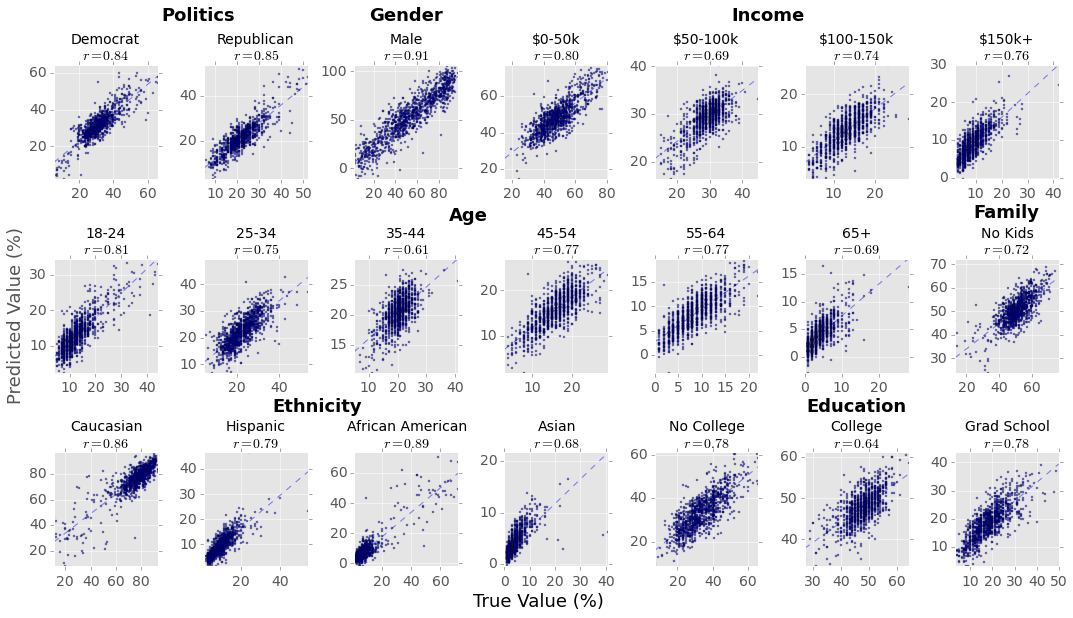

In [714]:
# Plot scatters.
import math
from matplotlib import lines

plt.style.use('ggplot')

def nrmsd(truths, preds):
    """ Normalized root mean squared deviation. """
    return rmsd(truths, preds) / (max(truths) - min(truths))

def rmsd(truths, preds):
    """ Normalized root mean squared deviation. """
    return math.sqrt(mean_squared_error(preds, truths))

def plot_scatter_subfig(category_results, axis, category, yidx):
    results = category_results[category]
    name = outputs[category][yidx]
    preds = [p[yidx] for p in results['preds']]
    truths = [p[yidx] for p in results['truths']]

    fit = np.polyfit(truths, preds, 1)
    fit_fn = np.poly1d(fit)
    tr_extrema = [min(truths),max(truths)]
    axis.plot(tr_extrema, fit_fn(tr_extrema),'b--', linewidth=1, alpha=.5)  # , color='#9C9C9C')
    axis.plot(truths, preds, 'bo', alpha=.5, ms=2)
    #axis.plot(truths, preds, 'o', truths, fit_fn(truths), 'k', linewidth=1.1,
    #          ms=2, markerfacecolor='None', markeredgecolor='b')
    axis.set_title('%s\n$r=%.2f$' % (name, pearsonr(preds, truths)[0]), size=14)
    axis.locator_params(nbins=5, tight=True) 
    mean = np.mean(truths)
    start, end = axis.get_xlim()
 
def make_scatters_fig(category_results):
    figure, axes = plt.subplots(3, 7, figsize=(15,8))
    # Row 1
    plot_scatter_subfig(category_results, axes[0][0], 'Politics', 0)
    plot_scatter_subfig(category_results, axes[0][1], 'Politics', 1)
    plot_scatter_subfig(category_results, axes[0][2], 'Gender', 0)        
    plot_scatter_subfig(category_results, axes[0][3], 'Income', 0)
    plot_scatter_subfig(category_results, axes[0][4], 'Income', 1)
    plot_scatter_subfig(category_results, axes[0][5], 'Income', 2)
    plot_scatter_subfig(category_results, axes[0][6], 'Income', 3)
    # Row 2
    for i in range(6):
        plot_scatter_subfig(category_results, axes[1][i], 'Age', i)        
    plot_scatter_subfig(category_results, axes[1][6], 'Children', 0)    

    # Row 3
    for i in range(4):
        plot_scatter_subfig(category_results, axes[2][i], 'Ethnicity', i)
    plot_scatter_subfig(category_results, axes[2][4], 'Education', 0)
    plot_scatter_subfig(category_results, axes[2][5], 'Education', 1)
    plot_scatter_subfig(category_results, axes[2][6], 'Education', 2)

    axes[0, 1].text(-.05, 1.35, 'Politics',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=18, weight='bold', transform=axes[0, 1].transAxes)
    axes[0, 2].text(.5, 1.35, 'Gender',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=18, weight='bold', transform=axes[0, 2].transAxes)
    axes[0, 4].text(1.1, 1.35, 'Income',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=18, weight='bold', transform=axes[0, 4].transAxes)
    axes[1, 2].text(1.1, 1.3, 'Age',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=18, weight='bold', transform=axes[1, 2].transAxes)
    axes[1, 6].text(.5, 1.32, 'Family',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=18, weight='bold', transform=axes[1, 6].transAxes)
    axes[2, 1].text(1.1, 1.32, 'Ethnicity',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=18, weight='bold', transform=axes[2, 1].transAxes)
    axes[2, 5].text(.5, 1.32, 'Education',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=18, weight='bold', transform=axes[2, 5].transAxes)

    axes[1][0].set_ylabel('Predicted Value (%)', size=18)
    plt.figtext(0.5,.01,"True Value (%)",fontdict={'fontsize':18}, verticalalignment='top', horizontalalignment='center')
    # figure.set_size_inches(12,8)
    figure.tight_layout()
    plt.subplots_adjust(hspace=.7)   
    figure.show()
    plt.savefig('scatters.pdf', bbox_inches='tight')


make_scatters_fig(category_results_both2)

```ElasticNetCV:
84/73/89
alpha chosen= 9.88759941363e-06 l1ratio chosen= 0.5
alpha chosen= 9.88123433773e-06 l1ratio chosen= 0.5
alpha chosen= 1.05984195308e-05 l1ratio chosen= 0.5
alpha chosen= 1.00014682098e-05 l1ratio chosen= 0.5
alpha chosen= 1.00588197082e-05 l1ratio chosen= 0.5
alpha chosen= 1.00846425908e-05 l1ratio chosen= 0.5

Ridge (.1) (best of [.1, .3, .5, .8, 1., 3., 5., 10.])
76/52/83
```

In [160]:
# Print the top features.
from collections import defaultdict
from twutil import collect

def get_top_user_ids(category_results, feats):
    id_list = []
    top_user_ids = defaultdict(lambda: defaultdict(lambda: []))
    for category in category_results:
        results = category_results[category]
        coef = results['model'].coef_
        for yi, ylabel in enumerate(outputs[category]):
            topi = np.argsort(coef[yi])[::-1][:5]
            print category, ylabel, ' '.join('%d' % x for x in feats[topi])
            id_list.extend(feats[topi])
            top_user_ids[category][ylabel] = feats[topi]
    return top_user_ids, id_list

def get_top_user_names(category_results, feats):
    top_user_ids, id_list = get_top_user_ids(category_results, feats)
    user_names = collect.lookup_handles(id_list)
    id2user = dict([(int(x[1]), x[0]) for x in user_names])
    for category in top_user_ids:
        for label in top_user_ids[category]:
            top_user_ids[category][label] = [id2user[x] for x in top_user_ids[category][label] if x  in id2user]
    return top_user_ids

top_users = get_top_user_names(category_results_fol, fol_feats)

 Gender Male 51263592 26257166 2557521 28870086 1344951
Gender Female 15846407 19397785 21324258 106837463 11522502
Age 18-24 18927441 10671602 29758446 14922225 36803580
Age 25-34 6480682 22027186 31080039 23544596 1344951
Age 35-44 428333 813286 51241574 16331010 2557521
Age 45-54 1367531 428333 51241574 3108351 759251
Age 55-64 1367531 428333 51241574 28785486 3108351
Age 65+ 1367531 51241574 3108351 428333 14669951
Income $0-50k 10228272 10671602 18927441 29758446 27195114
Income $50-100k 51263592 428333 26257166 2557521 120943272
Income $100-150k 3108351 2557521 51263592 26257166 120943272
Income $150k+ 3108351 5988062 91478624 807095 34713362
Politics Democrat 813286 19397785 14677919 25110374 409486555
Politics Republican 1367531 15976697 41634520 110445334 14669951
Education No College 10228272 10671602 29758446 24742040 18927441
Education College 16303106 1344951 115485051 972651 22027186
Education

/Users/awculott/.local/lib/python2.7/site-packages/requests/packages/urllib3/util/ssl_.py:90: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
/Users/awculott/.local/lib/python2.7/site-packages/requests/packages/urllib3/util/ssl_.py:90: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


 Grad School 807095 3108351 14677919 5988062 2467791
Children No Kids 14677919 16303106 807095 16129920 14089195
Children Has Kids 18784113 29730065 16581734 15846407 14709355
Ethnicity Caucasian 15485441 1367531 14920785 15846407 14075928
Ethnicity Hispanic 16664681 20346956 16374678 23043294 10252962
Ethnicity African American 23151437 27195114 117778179 18220175 25110374
Ethnicity Asian 816653 1344951 50393960 5988062 36511031


In [161]:
from tabulate import tabulate
for label, values in top_users.iteritems():
    print tabulate(values, headers=values.keys())
    print

Male          Female
------------  -------------
AdamSchefter  TheEllenShow
SportsCenter  Oprah
espn          MarthaStewart
mortreport    Pinterest
WIRED         Etsy

55-64    25-34        65+            18-24          45-54    35-44
-------  -----------  -------------  -------------  -------  -----------
FoxNews  azizansari   FoxNews        IGN            FoxNews  cnnbrk
cnnbrk   lenadunham   AP             PlayStation    cnnbrk   BarackObama
AP       mindykaling  WSJ            RockstarGames  AP       AP
ABC      WIRED        cnnbrk         Ubisoft        WSJ      TMZ
WSJ                   DRUDGE_REPORT  steam_games    CNN      espn

$100-150k     $0-50k         $50-100k      $150k+
------------  -------------  ------------  ------------
WSJ           YouTube        AdamSchefter  WSJ
espn          PlayStation    cnnbrk        TheEconomist
AdamSchefter  IGN            SportsCenter  Forbes
SportsCenter  RockstarGames  espn          nytimes
ErinAndrews   Drake          ErinAndrews   bu

In [635]:
import re

def list2row(mylist, fmt='%s'):
    return u' & '.join([fmt % i for i in mylist])

def verb(s, delim=';'):
    return '\\verb' + delim + s + delim

def clean(s):
    s = re.sub('MENTION_', '@', s)
    s = re.sub('HASHTAG_', '\#', s)
    s = re.sub('_', '\\_', re.sub('\$', '\\$', s))
    s = re.sub('African American', 'Afr. Amer.', s)
    return '\\mbox{' + s + '}'

def make_user_table(top_users):
    outf = open('users.tex', 'wt')
    outf.write('\\begin{table*}[t]\n\\centering\n\\begin{tabular}{|c|c|p{10.2cm}|}\n\\hline\n')
    outf.write(list2row(['{\\bf Category}', '{\\bf Value}', '{\\bf Top Accounts}']) +
                   '\\\\\n\\hline\n')
    for ci, category in enumerate(outputs):
        for li, label in enumerate(outputs[category]):
            row = [''] * 3
            row[0] = category if li == 0 else ''
            row[1] = clean(label)
            row[2] = ', '.join(clean(x) for x in top_users[category][label])
            outf.write(list2row(row) + '\\\\\n')
        outf.write('\\hline\n')
    outf.write('\\end{tabular}\\caption{Accounts with the highest estimated coefficients for each category.\\label{tab.users}}\n\\end{table*}\n')

make_user_table(top_users)
    

In [636]:
import io

def get_top_terms(category_results, outputs, feats):
    term_list = []
    top_terms = defaultdict(lambda: defaultdict(lambda: []))
    for category in category_results:
        results = category_results[category]
        coef = results['model'].coef_
        for yi, ylabel in enumerate(outputs[category]):
            topi = np.argsort(coef[yi])[::-1][:10]
            print category, ylabel, ' '.join('%s' % x for x in feats[topi])
            term_list.extend(feats[topi])
            top_terms[category][ylabel] = feats[topi]
    return top_terms, term_list

def make_term_table(top_terms):
    outf = io.open('terms.tex', 'wt', encoding='utf8')
    outf.write(u'\\begin{table*}[t]\n\\centering\n\\begin{tabular}{|c|c|p{10.2cm}|}\n\\hline\n')
    outf.write(list2row(['{\\bf Category}', '{\\bf Value}', '{\\bf Top Terms}']) +
                   '\\\\\n\\hline\n')
    for ci, category in enumerate(outputs):
        for li, label in enumerate(outputs[category]):
            row = [''] * 3
            row[0] = category if li == 0 else ''
            row[1] = clean(label)
            row[2] = ', '.join(clean(x) for x in top_terms[category][label])
            outf.write(list2row(row) + '\\\\\n')
        outf.write(u'\\hline\n')
    outf.write(u'\\end{tabular}\\caption{Terms with the highest estimated coefficients for each category.\\label{tab.terms}}\n\\end{table*}\n')

top_terms, term_list = get_top_terms(category_results_text, outputs, text_feats)
make_term_table(top_terms)

Gender Male film guy gay man fuck game team internet review guys
Gender Female hair her omg family girl she girls cute beautiful thinking
Age 18-24 d haha album x xd _: actually stream wanna im
Age 25-34 super dc baby definitely nba pregnancy wedding even entire nyc
Age 35-44 star fans kids tv bike mind store awesome screen son
Age 45-54 wow vote american comes ca santa county boys nice high
Age 55-64 vote golf red american country north county holiday smile 99,999
Age 65+ vote golf MENTION_foxnews holiday may american he family north national
Income $0-50k lol games MENTION_youtube damn black ps9 side d community god
Income $50-100k great seattle he performance lose usa kansas iphone wow cold
Income $100-150k santa flight nice looks practice congrats bike dc retweet ride
Income $150k+ dc nyc market MENTION_wsj congrats beach san york ca looks
Politics Democrat women u ain't nyc equality la voice seattle dc MENTION_nytimes
Politics Republican MENTION_foxnews christmas HASHTAG_tcot foot

Overall, we find an average held-out correlation of $.77$ with the brand demographics from QuantCast. This is rather surprising, given that we're only considering 120 followers of a brand.

## Next, we validate against a list of users manually labeled by race, gender, and political preference.

** Race experiments **

In [309]:
if False:  # parse raw tweets
    race_users_text = []
    X_race_text = text_vec.transform(text for theid, text in extract_tweets('data/labeled_tweets.json.gz', 'screen_name')
                                if not race_users_text.append(theid))
    cPickle.dump((race_users_text, X_race_text), open('data/race_text_data.pkl', 'wb'))
else:  # unpickle
    race_users_text, X_race_text = cPickle.load(open('data/race_text_data.pkl', 'rb'))

In [310]:
print X_race_text.shape
print race_users_text[:10]

(509, 112642)
[u'0412cristian', u'14feernandaa', u'1dtampa', u'24baumann', u'2throwedyoungin', u'4ever_moore', u'4theluvofalicia', u'8a_juanpp', u'__dtdm__', u'__kayshaa']


In [311]:
# Read follower features.
from collections import Counter

def map_race_label(label):
    return ['white', 'latin', 'black'].index(label)

def read_labeled_data_fol(fname, label_map_f, vec):
    users = []
    labels = []
    friends = []
    for line in open(fname):
        parts = line.strip().split()
        if len(parts) > 10:
            users.append(parts[0])
            labels.append(label_map_f(parts[1]))
            friends.append(Counter([int(x) for x in parts[2:]]))
    X_race = vec.transform(friends)
    return users, npa(labels), X_race

race_users_fol, y_race, X_race_fol = read_labeled_data_fol('data/race.txt', map_race_label, vec)

In [312]:
print race_users_fol[:10]
print 'race distribution:', Counter(y_race).most_common(5)

['surnpolitics', 'livingpeace_', 'julianpatrickr', 'jmdheisman', 'frm_atlanta', 'prettygiirl_ri', 'bitchesloveshan', 'g_luminati93', 'golden_ovo', 'welsh_boyy']
race distribution: [(0, 265), (2, 221), (1, 129)]


In [313]:
# sort text and follower instances to be in same order.
race_users = sorted(list(set(race_users_text) & set(race_users_fol)))
print len(race_users_text), 'users from text, ', len(race_users_fol), 'from followers, ', len(race_users), 'on both'
X_race_fol2 = X_race_fol[[race_users_fol.index(u) for u in race_users]]
y_race2 = y_race[[race_users_fol.index(u) for u in race_users]]
X_race_text2 = X_race_text[[race_users_text.index(u) for u in race_users]]

509 users from text,  615 from followers,  509 on both


In [314]:
X_race_both2 = scipy.sparse.hstack((X_race_fol2, X_race_text2)).tocsr()
print X_race_fol2.shape
print X_race_text2.shape
print X_race_both2.shape
print len(y_race2)

(509, 46649)
(509, 112642)
(509, 159291)
509


In [511]:
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize

def label_by_clf(X_race, y_race, pct):
    clf = LogisticRegression()
    cv = KFold(len(y_race), 3, shuffle=True, random_state=123456)
    preds = np.zeros(len(y_race), int)
    for train, test in cv:
        train = random.sample(train, int(len(train) * pct))
        clf.fit(X_race[train], y_race[train])
        preds[test] = clf.predict(X_race[test])
    return preds

def label_by_reg_helper(X, m, label_indices=None, standardize_coef=True, rm_neg_coef=True):
    """ Scale coefficients per class to make them comparable;
    then keep only positive coefficients. """
    if not label_indices:
        label_indices = range(len(m.coef_))
    coef = m.coef_[label_indices]
    if standardize_coef:
        coef = scale(coef, axis=0)  # Scale by class label
    if rm_neg_coef:
        for i in range(len(coef)):
            topi = np.where(coef[i] > 0)
            topv = coef[i][topi]
            coef[i] = [0] * len(coef[i])
            coef[i][topi] = topv
    return safe_sparse_dot(coef, X.T, dense_output=True).T

def label_by_reg(X, m, label_indices=None, standardize_coef=True, rm_neg_coef=True):
    probs = label_by_reg_helper(X, m, label_indices, standardize_coef, rm_neg_coef)
    return np.argmax(probs, axis=1)

def label_by_reg_both(X1, X2, m1, m2, label_indices=None, standardize_coef=True, rm_neg_coef=True):
    """ Combine two regression models by scaling their outputted dot products and summing. """
    probs1 = label_by_reg_helper(X1, m1, label_indices, standardize_coef, rm_neg_coef)
    probs2 = label_by_reg_helper(X2, m2, label_indices, standardize_coef, rm_neg_coef)
    probs1 = scale(probs1)
    probs2 = scale(probs2)
    return np.argmax(probs1 + probs2, axis=1)


def eval_labeled(truth, pred, labels):
    label_idx = np.arange(len(labels))
    acc, f1 = (accuracy_score(pred, truth),
                       f1_score(truth, pred, labels=label_idx,
                                average='macro', pos_label=None))
    print 'acc=', acc, 'f1=', f1
    # print confusion_matrix(truth, pred)
    return f1

In [331]:
# Retrain race models from distant supervision
def train_demo_model(X, ylabels, id2brand, model_f):
    indices = [i for i, bid in enumerate(brand_ids) if len(set(ylabels) & set(id2brand[bid]['demo'].keys())) == len(ylabels)]
    print 'training race model on', len(indices), 'brands'
    y = npa([get_yvalues(ylabels, id2brand[brand_ids[bid]]['demo']) for bid in indices])
    m = model_f() # MultiTaskElasticNet(alpha=1e-5, l1_ratio=0.5)
    m.fit(X[indices], scale(y))
    return m

race_labels = ['Caucasian', 'Hispanic', 'African American']
race_model_fol = train_demo_model(X, race_labels, id2brand, get_model_fol)
race_model_text = train_demo_model(X_text, race_labels, id2brand, get_model_text)
race_model_both = train_demo_model(X_both2, race_labels, id2brand, get_model_both)

training race model on 1035 brands
training race model on 1035 brands
training race model on 1035 brands


In [448]:
def eval_labeled_all(y, X_fol, X_text, X_both, labels, label_indices, 
                     model_fol, model_text, model_both,
                     standardize_coef, rem_neg_coef):    
    f1s = []
    print 'distant, followers:'
    f1s.append(eval_labeled(y, label_by_reg(X_fol, model_fol, label_indices, standardize_coef, rem_neg_coef), labels))
    print 'distant, text:'
    f1s.append(eval_labeled(y, label_by_reg(X_text, model_text, label_indices, standardize_coef, rem_neg_coef), labels)) 
    print 'distant, both (two models):'
    f1s.append(eval_labeled(y, label_by_reg_both(X_fol, X_text, model_fol, model_text, label_indices, standardize_coef, rem_neg_coef), labels)) 
    print 'distant, both (single model):'
    f1s.append(eval_labeled(y, label_by_reg(X_both, model_both, label_indices, standardize_coef, rem_neg_coef), labels)) 
    print 'max f1=', max(f1s), 'avg f1=', np.mean(f1s)

def eval_labeled_all_sup(y, X_fol, X_text, X_both, labels):
    f1s = []
    print 'supervised, followers:'
    f1s.append(eval_labeled(y, label_by_clf(X_fol, y, 1), labels))
    print 'supervised, text:'
    f1s.append(eval_labeled(y, label_by_clf(X_text, y, 1), labels))
    print 'supervised, both:'
    f1s.append(eval_labeled(y, label_by_clf(X_both, y, 1), labels))
    print 'max f1=', max(f1s), 'avg f1=', np.mean(f1s)

In [398]:
eval_labeled_all_sup(y_race2, X_race_fol2, X_race_text2, X_race_both2, race_labels)

supervised, followers:
acc= 0.703339882122 f1= 0.675029999056
supervised, text:
acc= 0.870333988212 f1= 0.863935615563
supervised, both:
acc= 0.870333988212 f1= 0.863935615563
max f1= 0.863935615563 avg f1= 0.800967076727


In [450]:
# Race results for original regression models.
for std_coef, rem_neg in [[True, True], [True, False], [False, True], [False, False]]:
    print '\nstd coef=', std_coef, 'rem neg=', rem_neg
    eval_labeled_all(y_race2, X_race_fol2, X_race_text2, X_race_both2, race_labels, [0,1,2],
            category_results_fol['Ethnicity']['model'],
            category_results_text['Ethnicity']['model'],
            category_results_both2['Ethnicity']['model'],
            standardize_coef=std_coef, rem_neg_coef=rem_neg)


std coef= True rem neg= True
distant, followers:
acc= 0.650294695481 f1= 0.643488711046
distant, text:
acc= 0.56974459725 f1= 0.504410418615
distant, both (two models):
acc= 0.766208251473 f1= 0.756225898156
distant, both (single model):
acc= 0.571709233792 f1= 0.504694649396
max f1= 0.756225898156 avg f1= 0.602204919303

std coef= True rem neg= False
distant, followers:
acc= 0.607072691552 f1= 0.601224003347
distant, text:
acc= 0.86836935167 f1= 0.863567734103
distant, both (two models):
acc= 0.819253438114 f1= 0.810673602087
distant, both (single model):
acc= 0.583497053045 f1= 0.515628969716
max f1= 0.863567734103 avg f1= 0.697773577313

std coef= False rem neg= True
distant, followers:
acc= 0.666011787819 f1= 0.65247194779
distant, text:
acc= 0.689587426326 f1= 0.610944025515
distant, both (two models):
acc= 0.75442043222 f1= 0.744424475605
distant, both (single model):
acc= 0.563850687623 f1= 0.511660803134
max f1= 0.744424475605 avg f1= 0.629875313011

std coef= False rem neg= F

** Gender experiments **

In [374]:
def map_gender_label(label):
    return ['Male', 'Female'].index(label)

gender_labels = ['Male', 'Female']
gender_users_fol, y_gender, X_gender_fol = read_labeled_data_fol('data/gender.txt', map_gender_label, vec)
gender_users = sorted(list(set(race_users_text) & set(gender_users_fol)))
print len(race_users_text), 'users from text, ', len(gender_users_fol), 'from followers, ', len(gender_users), 'on both'
X_gender_fol = X_gender_fol[[gender_users_fol.index(u) for u in gender_users]]
y_gender = y_gender[[gender_users_fol.index(u) for u in gender_users]]
X_gender_text = X_race_text[[race_users_text.index(u) for u in gender_users]]
X_gender_both = scipy.sparse.hstack((X_gender_fol, X_gender_text)).tocsr()
print X_gender_fol.shape
print X_gender_text.shape
print X_gender_both.shape
print len(y_gender)

509 users from text,  213 from followers,  175 on both
(175, 46649)
(175, 112642)
(175, 159291)
175


In [345]:
gender_model_fol = train_demo_model(X, gender_labels, id2brand, get_model_fol)
gender_model_text = train_demo_model(X_text, gender_labels, id2brand, get_model_text)
gender_model_both = train_demo_model(X_both2, gender_labels, id2brand, get_model_both)

training race model on 1066 brands
training race model on 1066 brands
training race model on 1066 brands


In [401]:
eval_labeled_all_sup(y_gender, X_gender_fol, X_gender_text, X_gender_both, gender_labels)

supervised, followers:
acc= 0.708571428571 f1= 0.663575709601
supervised, text:
acc= 0.851428571429 f1= 0.844476346732
supervised, both:
acc= 0.845714285714 f1= 0.838896655188
max f1= 0.844476346732 avg f1= 0.782316237174


In [451]:
# Gender results for regression models retrained after scaling y.
for std_coef, rem_neg in [[True, True], [True, False], [False, True], [False, False]]:
    print '\nstd coef=', std_coef, 'rem neg=', rem_neg
    eval_labeled_all(y_gender, X_gender_fol, X_gender_text, X_gender_both, gender_labels, [0,1],
                gender_model_fol, gender_model_text, gender_model_both,
                    std_coef, rem_neg)


std coef= True rem neg= True
distant, followers:
acc= 0.771428571429 f1= 0.771361379671
distant, text:
acc= 0.72 f1= 0.719853637819
distant, both (two models):
acc= 0.857142857143 f1= 0.855615326227
distant, both (single model):
acc= 0.84 f1= 0.831638262782
max f1= 0.855615326227 avg f1= 0.794617151625

std coef= True rem neg= False
distant, followers:
acc= 0.771428571429 f1= 0.771361379671
distant, text:
acc= 0.72 f1= 0.719853637819
distant, both (two models):
acc= 0.822857142857 f1= 0.818858726502
distant, both (single model):
acc= 0.84 f1= 0.831638262782
max f1= 0.831638262782 avg f1= 0.785428001693

std coef= False rem neg= True
distant, followers:
acc= 0.782857142857 f1= 0.781652219595
distant, text:
acc= 0.571428571429 f1= 0.465180717982
distant, both (two models):
acc= 0.811428571429 f1= 0.808933002481
distant, both (single model):
acc= 0.834285714286 f1= 0.823102931437
max f1= 0.823102931437 avg f1= 0.719717217874

std coef= False rem neg= False
distant, followers:
acc= 0.7828

In [452]:
# Gender results for original regression models
for std_coef, rem_neg in [[True, True], [True, False], [False, True], [False, False]]:
    print '\nstd coef=', std_coef, 'rem neg=', rem_neg
    eval_labeled_all(y_gender, X_gender_fol, X_gender_text, X_gender_both, gender_labels, [0,1],
                category_results_fol['Gender']['model'],
                category_results_text['Gender']['model'],
                category_results_both2['Gender']['model'],
                std_coef, rem_neg)


std coef= True rem neg= True
distant, followers:
acc= 0.754285714286 f1= 0.754253616799
distant, text:
acc= 0.857142857143 f1= 0.85622268231
distant, both (two models):
acc= 0.834285714286 f1= 0.832092638544
distant, both (single model):
acc= 0.605714285714 f1= 0.553191489362
max f1= 0.85622268231 avg f1= 0.748940106754

std coef= True rem neg= False
distant, followers:
acc= 0.754285714286 f1= 0.754253616799
distant, text:
acc= 0.857142857143 f1= 0.85622268231
distant, both (two models):
acc= 0.868571428571 f1= 0.865604861598
distant, both (single model):
acc= 0.605714285714 f1= 0.553191489362
max f1= 0.865604861598 avg f1= 0.757318162517

std coef= False rem neg= True
distant, followers:
acc= 0.8 f1= 0.798711755233
distant, text:
acc= 0.845714285714 f1= 0.838079572324
distant, both (two models):
acc= 0.862857142857 f1= 0.860853432282
distant, both (single model):
acc= 0.668571428571 f1= 0.645104895105
max f1= 0.860853432282 avg f1= 0.785687413736

std coef= False rem neg= False
dista

** Politics experiments. **

In [486]:
def parse_tsv(tsv_file, id_idx, text_idx, label_idx):
    for line in io.open(tsv_file, encoding='utf8'):
        parts = line.split('\t')
        yield (parts[id_idx], parts[text_idx], parts[label_idx])
        
def extract_tweets_tsv(tsv_file, id_idx=0, text_idx=4, label_idx=2, min_tweets=0):
    """ Yield screen_name, string tuples, where the string is the
    concatenation of all tweets of this user. """
    for user_id, tweet_iter in groupby(parse_tsv(tsv_file, id_idx, text_idx, label_idx), lambda x: x[0]):
        tweets = [(t[1], t[2]) for t in tweet_iter]
        if len(tweets) >= min_tweets:
            yield user_id, ' '.join(t[0] for t in tweets), tweets[0][1]

if True:  # parse raw tweets
    pol_users_text = []
    y_pol = []
    X_pol_text = text_vec.transform(text for theid, text, label in
                                    extract_tweets_tsv('data/geo-centric.user.time.tsv')
                                    if not pol_users_text.append(theid) and
                                   not y_pol.append(label))
    y_pol = npa(y_pol)
    cPickle.dump((pol_users_text, X_pol_text, y_pol), open('data/pol_text_data.pkl', 'wb'))
else:  # unpickle
    pol_users_text, X_pol_text, y_pol = cPickle.load(open('data/pol_text_data.pkl', 'rb'))

In [487]:
print X_pol_text.shape
print X_pol_text[0].nnz
print len(pol_users_text)
print Counter(y_pol).most_common(2)
print pol_users_text[0]

(413, 112642)
817
413
[(u'Democratic', 230), (u'Republican', 183)]
26689553


In [488]:
def map_pol_label(label):
    return ['Democratic', 'Republican'].index(label)

def read_labeled_data_fol_pol(fname, vec):
    users = []
    labels = []
    friends = []
    for line in io.open(fname, encoding='utf8'):
        js = json.loads(line)
        if 'ids' in js:
            users.append(js['user_id'])
            friends.append(Counter(int(x) for x in js['ids']))
    X_pol = vec.transform(friends)
    return users, X_pol

pol_users_fol, X_pol_fol = read_labeled_data_fol_pol('data/geo-ids-fol.json', vec)

In [489]:
print X_pol_fol.shape
print X_pol_fol[0].nnz
print pol_users_fol[0]

(366, 46649)
221
26689553


In [490]:
# sort text and follower instances to be in same order.
pol_users = sorted(list(set(pol_users_text) & set(pol_users_fol)))
print len(pol_users_text), 'users from text, ', len(pol_users_fol), 'from followers, ', len(pol_users), 'on both'
X_pol_fol = X_pol_fol[[pol_users_fol.index(u) for u in pol_users]]
y_pol = y_pol[[pol_users_text.index(u) for u in pol_users]]
X_pol_text = X_pol_text[[pol_users_text.index(u) for u in pol_users]]

413 users from text,  366 from followers,  366 on both


In [491]:
X_pol_both = scipy.sparse.hstack((X_pol_fol, X_pol_text)).tocsr()
print X_pol_fol.shape
print X_pol_text.shape
print X_pol_both.shape
print len(y_pol)

(366, 46649)
(366, 112642)
(366, 159291)
366


In [503]:
# Map from labels to indices.
y_pol = np.array([map_pol_label(x) for x in y_pol])

In [513]:
pol_labels = ['Democratic', 'Republican']
eval_labeled_all_sup(y_pol, X_pol_fol, X_pol_text, X_pol_both, pol_labels)

supervised, followers:
acc= 0.833333333333 f1= 0.831000628279
supervised, text:
acc= 0.734972677596 f1= 0.725206083827
supervised, both:
acc= 0.860655737705 f1= 0.857192040212
max f1= 0.857192040212 avg f1= 0.804466250772


In [512]:
# Pol results for original regression models.
for std_coef, rem_neg in [[True, True], [True, False], [False, True], [False, False]]:
    print '\nstd coef=', std_coef, 'rem neg=', rem_neg
    eval_labeled_all(y_pol, X_pol_fol, X_pol_text, X_pol_both, pol_labels, [0,1],
            category_results_fol['Politics']['model'],
            category_results_text['Politics']['model'],
            category_results_both2['Politics']['model'],
            standardize_coef=std_coef, rem_neg_coef=rem_neg)


std coef= True rem neg= True
distant, followers:
acc= 0.808743169399 f1= 0.79863556338
distant, text:
acc= 0.584699453552 f1= 0.58189033189
distant, both (two models):
acc= 0.762295081967 f1= 0.760577465318
distant, both (single model):
acc= 0.767759562842 f1= 0.757580007948
max f1= 0.79863556338 avg f1= 0.724670842134

std coef= True rem neg= False
distant, followers:
acc= 0.808743169399 f1= 0.7991470413
distant, text:
acc= 0.581967213115 f1= 0.578946576939
distant, both (two models):
acc= 0.748633879781 f1= 0.744234800839
distant, both (single model):
acc= 0.767759562842 f1= 0.75813787152
max f1= 0.7991470413 avg f1= 0.720116572649

std coef= False rem neg= True
distant, followers:
acc= 0.819672131148 f1= 0.808066361556
distant, text:
acc= 0.650273224044 f1= 0.55969924812
distant, both (two models):
acc= 0.762295081967 f1= 0.757956748128
distant, both (single model):
acc= 0.647540983607 f1= 0.64747519245
max f1= 0.808066361556 avg f1= 0.693299387564

std coef= False rem neg= False
d

In [594]:
# Collect all the distantly supervised results.
reg_res = {'Friends': defaultdict(dict),
           'Text': defaultdict(dict),
           'Friends+Text': defaultdict(dict)
           }

reg_res['Friends']['Ethnicity'] = eval_labeled(y_race2,
                                          label_by_reg(X_race_fol2,
                                                       category_results_fol['Ethnicity']['model'],
                                                       [0,1,2], True, False),
                                          race_labels)
reg_res['Text']['Ethnicity'] = eval_labeled(y_race2,
                                       label_by_reg(X_race_text2,
                                                    category_results_text['Ethnicity']['model'],
                                                    [0,1,2], True, False),
                                          race_labels)
reg_res['Friends+Text']['Ethnicity'] = eval_labeled(y_race2,
                                               label_by_reg_both(X_race_fol2, X_race_text2,                                                                 
                                                                 category_results_fol['Ethnicity']['model'],
                                                                 category_results_text['Ethnicity']['model'],
                                                                 [0,1,2], True, False),
                                               race_labels)


reg_res['Friends']['Gender'] = eval_labeled(y_gender,
                                            label_by_reg(X_gender_fol,
                                                         category_results_fol['Gender']['model'],
                                                         [0,1], True, False),
                                            gender_labels)
reg_res['Text']['Gender'] = eval_labeled(y_gender,
                                         label_by_reg(X_gender_text,
                                                      category_results_text['Gender']['model'],
                                                      [0,1], True, False),
                                         gender_labels)
reg_res['Friends+Text']['Gender'] = eval_labeled(y_gender,
                                                 label_by_reg_both(X_gender_fol, X_gender_text,                                                                 
                                                                   category_results_fol['Gender']['model'],
                                                                   category_results_text['Gender']['model'],
                                                                   [0,1], True, False),
                                                 gender_labels)

reg_res['Friends']['Politics'] = eval_labeled(y_pol,
                                            label_by_reg(X_pol_fol,
                                                         category_results_fol['Politics']['model'],
                                                         [0,1], True, False),
                                            pol_labels)
reg_res['Text']['Politics'] = eval_labeled(y_pol,
                                         label_by_reg(X_pol_text,
                                                      category_results_text['Politics']['model'],
                                                      [0,1], True, False),
                                         pol_labels)
reg_res['Friends+Text']['Politics'] = eval_labeled(y_pol,
                                                 label_by_reg_both(X_pol_fol, X_pol_text,                                                                 
                                                                   category_results_fol['Politics']['model'],
                                                                   category_results_text['Politics']['model'],
                                                                   [0,1], True, False),
                                                 pol_labels)

print reg_res

acc= 0.607072691552 f1= 0.601224003347
acc= 0.86836935167 f1= 0.863567734103
acc= 0.819253438114 f1= 0.810673602087
acc= 0.754285714286 f1= 0.754253616799
acc= 0.857142857143 f1= 0.85622268231
acc= 0.868571428571 f1= 0.865604861598
acc= 0.808743169399 f1= 0.7991470413
acc= 0.581967213115 f1= 0.578946576939
acc= 0.748633879781 f1= 0.744234800839
{'Text': defaultdict(<type 'dict'>, {'Gender': 0.85622268230963883, 'Ethnicity': 0.8635677341034117, 'Politics': 0.57894657693898266}), 'Friends+Text': defaultdict(<type 'dict'>, {'Gender': 0.86560486159805006, 'Ethnicity': 0.81067360208666484, 'Politics': 0.74423480083857441}), 'Friends': defaultdict(<type 'dict'>, {'Gender': 0.75425361679892877, 'Ethnicity': 0.60122400334659531, 'Politics': 0.79914704129950764})}


In [533]:
pcts = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.]

sup_res = {'Friends': defaultdict(list),
           'Text': defaultdict(list),
           'Friends+Text': defaultdict(list)
           }
for pct in pcts:
    print 'PCT=', pct
    sup_res['Friends']['Ethnicity'].append(eval_labeled(y_race2, label_by_clf(X_race_fol2, y_race2, pct), race_labels))
    sup_res['Text']['Ethnicity'].append(eval_labeled(y_race2, label_by_clf(X_race_text2, y_race2, pct), race_labels))
    sup_res['Friends+Text']['Ethnicity'].append(eval_labeled(y_race2, label_by_clf(X_race_text2, y_race2, pct), race_labels))

    sup_res['Friends']['Gender'].append(eval_labeled(y_gender, label_by_clf(X_gender_fol, y_gender, pct), gender_labels))
    sup_res['Text']['Gender'].append(eval_labeled(y_gender, label_by_clf(X_gender_text, y_gender, pct), gender_labels))
    sup_res['Friends+Text']['Gender'].append(eval_labeled(y_gender, label_by_clf(X_gender_text, y_gender, pct), gender_labels))

    sup_res['Friends']['Politics'].append(eval_labeled(y_pol, label_by_clf(X_pol_fol, y_pol, pct), pol_labels))
    sup_res['Text']['Politics'].append(eval_labeled(y_pol, label_by_clf(X_pol_text, y_pol, pct), pol_labels))
    sup_res['Friends+Text']['Politics'].append(eval_labeled(y_pol, label_by_clf(X_pol_text, y_pol, pct), pol_labels))


PCT= 0.1
acc= 0.487229862475 f1= 0.412215146726
acc= 0.693516699411 f1= 0.71483266312
acc= 0.805500982318 f1= 0.808471580257
acc= 0.48 f1= 0.477543387684
acc= 0.565714285714 f1= 0.531953828829
acc= 0.634285714286 f1= 0.62395917271
acc= 0.704918032787 f1= 0.671966804979
acc= 0.532786885246 f1= 0.531524383398
acc= 0.584699453552 f1= 0.584500941057
PCT= 0.2
acc= 0.618860510806 f1= 0.526039734032
acc= 0.842829076621 f1= 0.840793575815
acc= 0.85068762279 f1= 0.850997483277
acc= 0.6 f1= 0.468684941013
acc= 0.737142857143 f1= 0.72619047619
acc= 0.777142857143 f1= 0.757333333333
acc= 0.830601092896 f1= 0.824169352839
acc= 0.639344262295 f1= 0.621248706451
acc= 0.628415300546 f1= 0.568889658756
PCT= 0.3
acc= 0.611001964637 f1= 0.563932199838
acc= 0.854616895874 f1= 0.853781824353
acc= 0.856581532417 f1= 0.851807336062
acc= 0.6 f1= 0.591666666667
acc= 0.8 f1= 0.794745484401
acc= 0.771428571429 f1= 0.739815640797
acc= 0.808743169399 f1= 0.798108747045
acc= 0.595628415301 f1= 0.519105113636
acc= 0

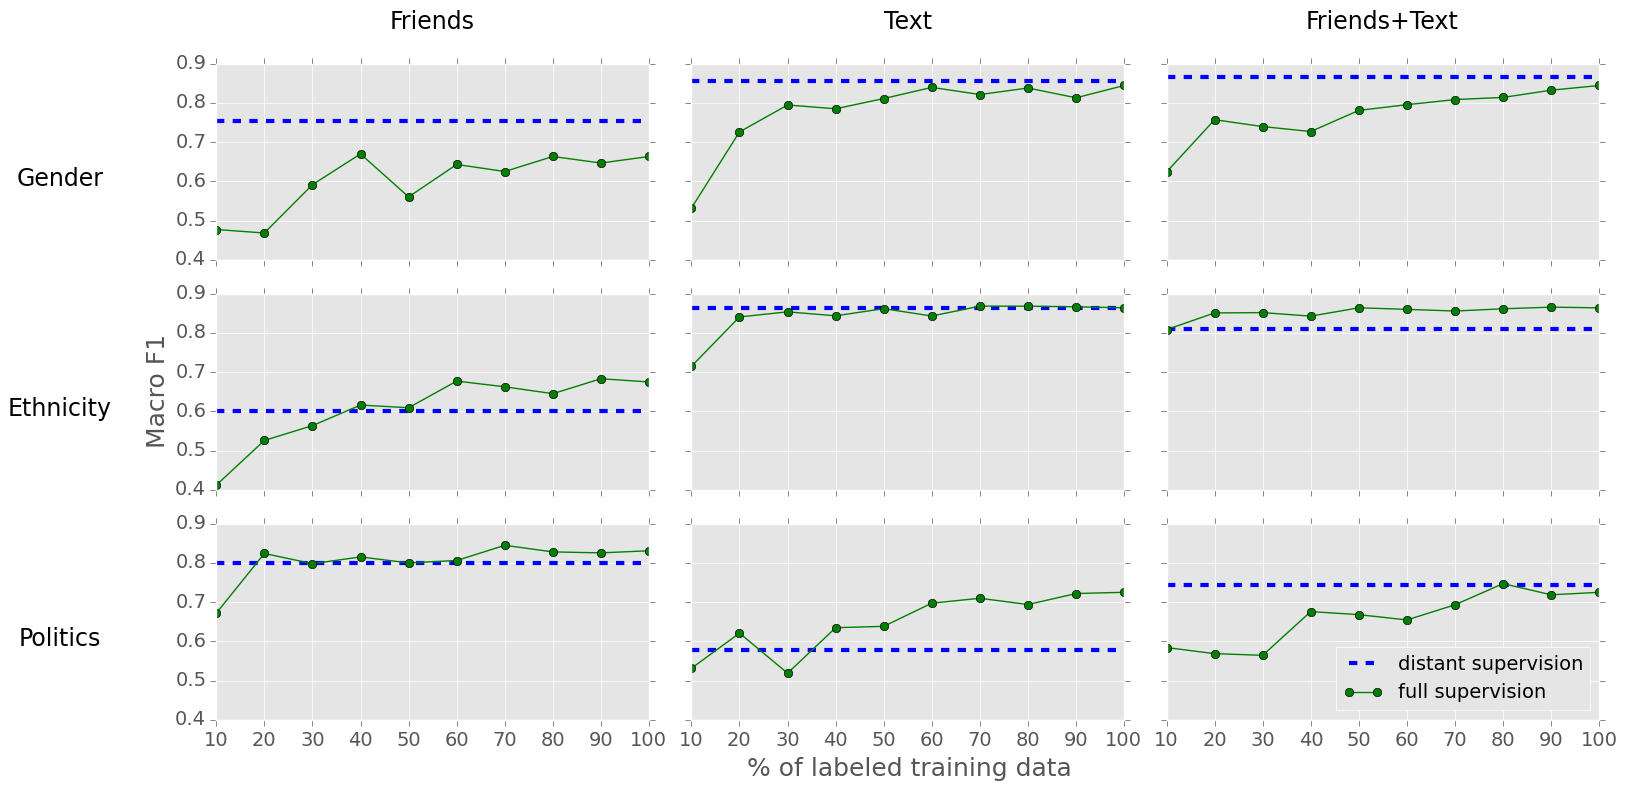

In [657]:
plt.style.use('ggplot')
# how to set back to default stylesheet??
#plt.rcdefaults()
#plt.rcParams.update(plt.rcParamsDefault)

def plot_curve(axis, feature, task, f1s, reg_f1, title):
    xticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    axis.plot(xticks, [reg_f1] * len(f1s), 'b--', label='distant supervision', lw=3)
    axis.plot(xticks, f1s, 'go-', label='full supervision')
    axis.set_title(title + '\n', size=17)
 

def plot_learning_curves(sup_res, reg_res, pcts):
    """
    3x3 plot with rows for task {gender, ethnicity, politics}
    and columns for features {followers, text, both}
    """
    figure, axes = plt.subplots(3, 3, figsize=(15,8), sharex=True, sharey=True)
    for col, feature in enumerate(['Friends', 'Text', 'Friends+Text']):
        tasks = sup_res[feature]
        for row, (task, f1s) in enumerate(tasks.items()):
            title = feature if row == 0 else ''
            plot_curve(axes[row][col], feature, task, f1s, reg_res[feature][task], title)
    axes[1][0].set_ylabel('Macro F1', size=18)
    axes[2][1].set_xlabel('% of labeled training data', size=18)
    axes[2][2].legend(loc='lower right', prop={'size':14})
    axes[0, 0].text(-.36, .35, 'Gender',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=17, transform=axes[0, 0].transAxes)
    axes[1, 0].text(-.36, .35, 'Ethnicity',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=17, transform=axes[1, 0].transAxes)
    axes[2, 0].text(-.36, .35, 'Politics',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=17, transform=axes[2, 0].transAxes)

    plt.tick_params(axis='both', labelsize=14)
    figure.tight_layout()
    figure.show()
    plt.savefig('curves.pdf', bbox_inches='tight')


plot_learning_curves(sup_res, reg_res, pcts)


In [633]:
X_race_text.shape

(509, 112642)

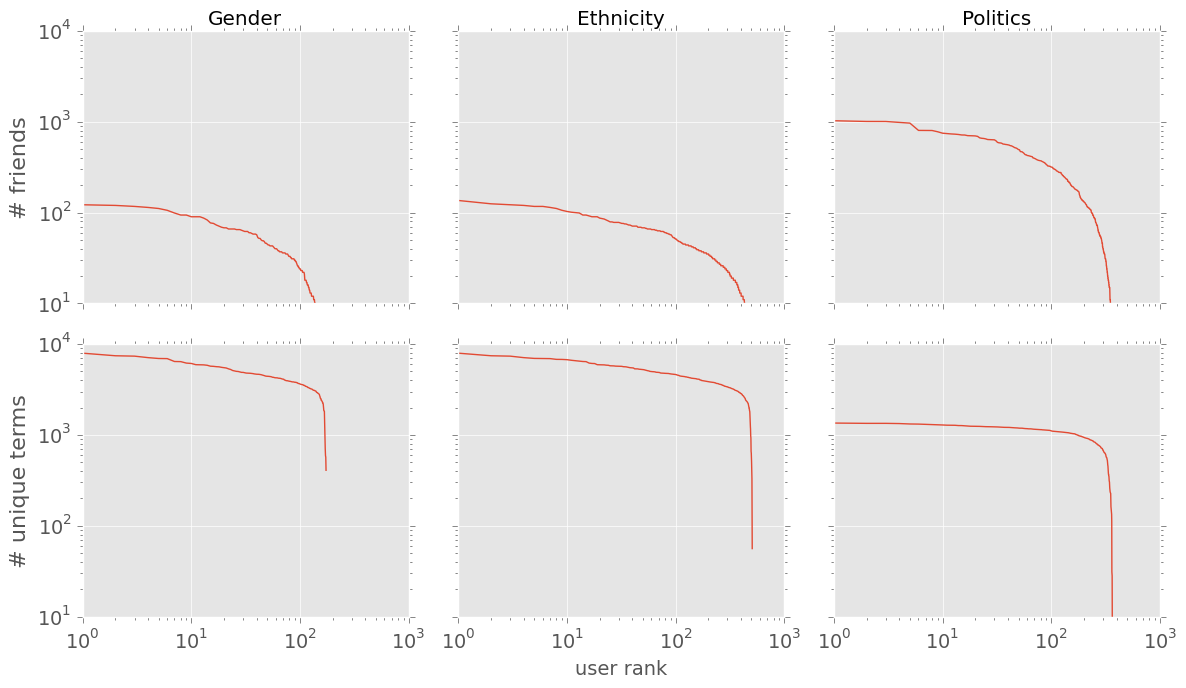

In [674]:
# Plot no. followers and no. terms per user in labeled data.
def get_nnzs(X):
    return sorted([row.nnz for row in X if row.nnz > 0], reverse=True)

def plot_labeld_data(X_gender_fol, X_gender_text, X_race_fol, X_race_text, X_pol_fol, X_pol_text):
    """ Plot log/log plots of number of followers/terms for each labeled user. """
    plt.style.use('ggplot')
    figure, axes = plt.subplots(2, 3, figsize=(12,7), sharex=True, sharey=True)
    axes[0][0].plot(get_nnzs(X_gender_fol))
    axes[0][0].set_title('Gender')
    axes[0][1].plot(get_nnzs(X_race_fol))
    axes[0][1].set_title('Ethnicity')
    axes[0][2].plot(get_nnzs(X_pol_fol))
    axes[0][2].set_title('Politics')
    axes[0][0].set_ylabel('# friends', size=16)
    axes[1][0].plot(get_nnzs(X_gender_text))
    axes[1][1].plot(get_nnzs(X_race_text))
    axes[1][2].plot(get_nnzs(X_pol_text))
    axes[1][0].set_ylabel('# unique terms', size=16)
    for a in np.reshape(axes, -1):
        a.set_yscale('log')
        a.set_xscale('log')
        #a.yaxis.set_ticks([1e1, 1e2, 1e3])
    axes[1, 1].set_xlabel('user rank', size=14)
    figure.tight_layout()
    figure.show()
    plt.savefig('lab-data.pdf', bbox_inches='tight')
    figure.show()

plot_labeld_data(X_gender_fol, X_gender_text, X_race_fol, X_race_text, X_pol_fol, X_pol_text)
    

In [677]:
# Plot F1 as the number of friends per user increases.
import random

def sample_friends(X, n):
    X_sample = X.copy()
    for i, xi in enumerate(X_sample):
        nnz = xi.getnnz()
        if n < nnz:
            nzcols = xi.nonzero()[1]
            indices = random.sample(range(nnz), nnz - n)
            X_sample[i, nzcols[indices]] = 0.
            X_sample.eliminate_zeros()
    return X_sample

def _do_nfriends_expt(XX, y, m, labels, label_indices, xs=[1,3,5,10,20,30,40,50]):
    ys = []
    stderrs = []
    for nfriends in xs:
        f1s = []
        for sample in range(5):
            X_sample = sample_friends(XX, nfriends)
            pred_reg = label_by_reg(X_sample, m, label_indices=label_indices, standardize_coef=True, rm_neg_coef=False)
            reg_f1 = eval_labeled(y, pred_reg, labels)
            f1s.append(reg_f1)
        print 'nfeats=', nfriends, 'mean f1=', np.mean(f1s)
        ys.append(np.mean(f1s))
        stderrs.append(np.std(f1s))  #  / math.sqrt(len(f1s)))
    return npa(xs), npa(ys), npa(stderrs)


def get_max_nnz(X):
    return max(r.nnz for r in X)

# collect all results.
xs_g_t, ys_g_t, stderrs_g_t = _do_nfriends_expt(X_gender_text, y_gender, category_results_text['Gender']['model'],
                                          gender_labels, [0,1], [10, 100, 1000, 2000, get_max_nnz(X_gender_text)])
xs_r_t, ys_r_t, stderrs_r_t = _do_nfriends_expt(X_race_text2, y_race2, category_results_text['Ethnicity']['model'],
                                          race_labels, [0,1,2], [10, 100, 1000, 2000, get_max_nnz(X_race_text2)])
xs_p_t, ys_p_t, stderrs_p_t = _do_nfriends_expt(X_pol_text, y_pol, category_results_text['Politics']['model'],
                                          pol_labels, [0,1], [10, 100, 1000, get_max_nnz(X_pol_text)])

xs_g, ys_g, stderrs_g = _do_nfriends_expt(X_gender_fol, y_gender, category_results_fol['Gender']['model'],
                                          gender_labels, [0,1])
xs_r, ys_r, stderrs_r = _do_nfriends_expt(X_race_fol2, y_race2, category_results_fol['Ethnicity']['model'],
                                          race_labels, [0,1,2])
xs_p, ys_p, stderrs_p = _do_nfriends_expt(X_pol_fol, y_pol, category_results_fol['Politics']['model'],
                                          pol_labels, [0,1])

acc= 0.502857142857 f1= 0.502272058583
acc= 0.485714285714 f1= 0.484350445259
acc= 0.537142857143 f1= 0.534956202224
acc= 0.565714285714 f1= 0.559369202226
acc= 0.514285714286 f1= 0.514031820706
nfeats= 10 mean f1= 0.5189959458
acc= 0.577142857143 f1= 0.576465201465
acc= 0.554285714286 f1= 0.553103719225
acc= 0.548571428571 f1= 0.54804014515
acc= 0.577142857143 f1= 0.577018552391
acc= 0.525714285714 f1= 0.525714285714
nfeats= 100 mean f1= 0.556068380789
acc= 0.725714285714 f1= 0.725633655605
acc= 0.765714285714 f1= 0.765714285714
acc= 0.725714285714 f1= 0.725705329154
acc= 0.782857142857 f1= 0.782509157509
acc= 0.748571428571 f1= 0.748563218391
nfeats= 1000 mean f1= 0.749625129275
acc= 0.828571428571 f1= 0.827891424076
acc= 0.8 f1= 0.799895455585
acc= 0.788571428571 f1= 0.788322599627
acc= 0.828571428571 f1= 0.828296703297
acc= 0.805714285714 f1= 0.804943613952
nfeats= 2000 mean f1= 0.809869959307
acc= 0.857142857143 f1= 0.85622268231
acc= 0.857142857143 f1= 0.85622268231
acc= 0.857142

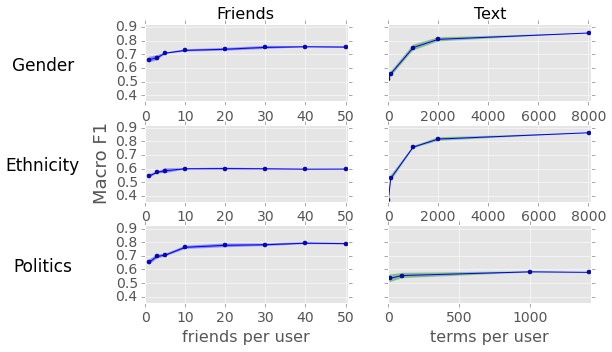

In [728]:
def plot_nfriends():
    figure, axes = plt.subplots(3, 2, figsize=(8,5), sharex=False, sharey=True)
    axes[0, 0].plot(xs_g, ys_g, 'bo-', ms=4, lw=1)
    axes[0, 0].fill_between(xs_g, ys_g - stderrs_g, ys_g + stderrs_g, alpha=0.4, facecolor='b')
    axes[0, 0].set_title('Friends', size=16)    
    axes[0, 1].plot(xs_g_t, ys_g_t, 'bo-', ms=4, lw=1)
    axes[0, 1].fill_between(xs_g_t, ys_g_t - stderrs_g_t, ys_g_t + stderrs_g_t, alpha=0.4, facecolor='g')
    axes[0, 1].set_title('Text', size=16)

    axes[1, 0].plot(xs_r, ys_r, 'bo-', ms=4)
    axes[1, 0].fill_between(xs_r, ys_r - stderrs_r, ys_r + stderrs_r, alpha=0.4, facecolor='b')
    axes[1, 1].plot(xs_r_t, ys_r_t, 'bo-', ms=4)
    axes[1, 1].fill_between(xs_r_t, ys_r_t - stderrs_r_t, ys_r_t + stderrs_r_t, alpha=0.4, facecolor='g')

    axes[2, 0].plot(xs_p, ys_p, 'bo-', ms=4)
    axes[2, 0].fill_between(xs_p, ys_p - stderrs_p, ys_p + stderrs_p, alpha=0.4, facecolor='b')
    axes[2, 1].plot(xs_p_t, ys_p_t, 'bo-', ms=4)
    axes[2, 1].fill_between(xs_p_t, ys_p_t - stderrs_p_t, ys_p_t + stderrs_p_t, alpha=0.4, facecolor='g')

    axes[2, 0].set_xlabel('friends per user', size=16)
    axes[2, 1].set_xlabel('terms per user', size=16)
    axes[1, 0].set_ylabel('Macro F1', size=18)
    axes[0, 0].text(-.5, .35, 'Gender',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=17, transform=axes[0, 0].transAxes)
    axes[1, 0].text(-.5, .35, 'Ethnicity',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=17, transform=axes[1, 0].transAxes)
    axes[2, 0].text(-.5, .35, 'Politics',
                    verticalalignment='bottom', horizontalalignment='center',
                    color='black', fontsize=17, transform=axes[2, 0].transAxes)
    for a in np.reshape(axes, -1):
        a.locator_params(nbins=6, tight=True) 
        a.set_xlim((-.1, a.get_xlim()[1]*1.01))
        a.set_ylim((a.get_ylim()[0], a.get_ylim()[1] + .01))
        
    plt.subplots_adjust(hspace=.3)   
    plt.savefig('friends.pdf', bbox_inches='tight')
    
plot_nfriends()